In [369]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [370]:
base_data = pd.read_csv('Performance_of_Customers_Booked_from_Past_Campaign.csv')
base_data

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
0,1,12.1,9168.8,5.8,165.0,3.0,15.6,7.0,20.0,51.0,525.0,60,14,C,787
1,2,3.0,8181.8,4.3,66.0,0.0,1.3,12.0,12.0,34.0,650.0,15,58,C,521
2,3,3.0,8883.1,0.3,33.0,3.0,0.0,12.0,12.0,36.0,250.0,105,72,E,1697
3,4,24.2,9272.7,1.6,198.0,3.0,10.4,7.0,104.0,41.0,500.0,75,88,E,1054
4,5,3.0,8779.2,1.9,66.0,0.0,0.0,6.0,12.0,37.0,225.0,45,4,C,1211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,9.1,9662.3,2.9,99.0,0.0,0.0,6.0,8.0,24.0,1200.0,0,48,E,3529
24996,24997,6.1,9870.1,3.9,99.0,3.0,0.0,2.0,36.0,56.0,1525.0,45,84,E,1111
24997,24998,12.1,10337.7,1.0,231.0,3.0,9.1,3.0,20.0,35.0,1075.0,165,3,E,1291
24998,24999,12.1,9233.8,0.7,231.0,6.1,0.0,12.0,16.0,26.0,700.0,495,37,E,3009


In [371]:
for i in base_data.columns:
    print(i, ':', base_data[i].nunique())

ID : 25000
long_term_credit_card_opening_propensity_score : 27
creditworthiness_score : 221
spend_potential : 406
number_of_credit_cards : 29
short_term_credit_card_opening_propensity_score : 13
long_term_credit_card_cancellation_propensity_score : 42
credit_card_utilization_score : 31
number_of_attempts_to_open_credit_cards : 56
history_at_credit_bureau : 59
total_limit_across_credit_cards : 368
contact_history_score : 65
Balance Transfer Propensity Score : 100
targeted_product : 5
Customer Lifetime Value : 5794


In [372]:
base_data.describe()

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,Customer Lifetime Value
count,25000.000000,24737.000000,24944.000000,22042.000000,24737.000000,24554.000000,24737.000000,23959.000000,24944.000000,24944.000000,24765.000000,25000.000000,25000.000000,25000.00000
mean,12500.500000,9.282961,9314.119175,3.344288,132.891135,2.975536,2.048377,6.690638,20.230917,32.947923,1196.817081,103.128000,50.371160,1939.26952
std,7217.022701,7.160336,554.854733,5.673776,95.618126,3.386335,3.660008,4.091516,19.461126,9.414332,1287.220228,139.767661,28.929872,1828.26727
min,1.000000,0.000000,8181.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,25.000000,0.000000,1.000000,-862.00000
25%,6250.750000,3.000000,8922.100000,0.700000,66.000000,0.000000,0.000000,3.000000,8.000000,25.000000,400.000000,0.000000,25.000000,709.00000
50%,12500.500000,9.100000,9311.700000,1.700000,99.000000,3.000000,0.000000,6.000000,16.000000,32.000000,775.000000,45.000000,50.000000,1395.50000
75%,18750.250000,12.100000,9662.300000,3.900000,165.000000,6.100000,2.600000,9.000000,28.000000,39.000000,1475.000000,150.000000,75.000000,2504.25000
max,25000.000000,124.200000,11039.000000,222.700000,957.000000,42.400000,97.400000,47.000000,284.000000,81.000000,25000.000000,1020.000000,100.000000,24532.00000


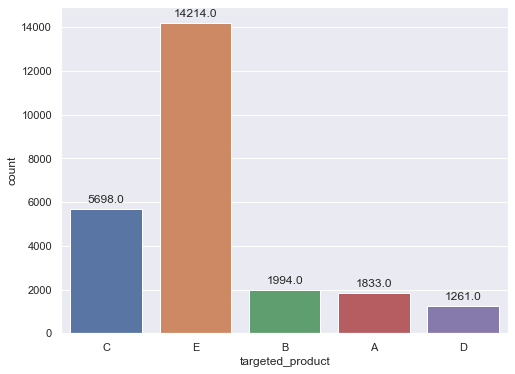

In [373]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='targeted_product', data=base_data)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext=(0,9), textcoords='offset points')

plt.savefig('1.png')

In [374]:
base_data['targeted_product'].value_counts()

E    14214
C     5698
B     1994
A     1833
D     1261
Name: targeted_product, dtype: int64

In [375]:
base_data.isnull().sum()

ID                                                        0
long_term_credit_card_opening_propensity_score          263
creditworthiness_score                                   56
spend_potential                                        2958
number_of_credit_cards                                  263
short_term_credit_card_opening_propensity_score         446
long_term_credit_card_cancellation_propensity_score     263
credit_card_utilization_score                          1041
number_of_attempts_to_open_credit_cards                  56
history_at_credit_bureau                                 56
total_limit_across_credit_cards                         235
contact_history_score                                     0
Balance Transfer Propensity Score                         0
targeted_product                                          0
Customer Lifetime Value                                   0
dtype: int64

In [376]:
base_data=base_data.dropna()

In [377]:
base_data

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
0,1,12.1,9168.8,5.8,165.0,3.0,15.6,7.0,20.0,51.0,525.0,60,14,C,787
1,2,3.0,8181.8,4.3,66.0,0.0,1.3,12.0,12.0,34.0,650.0,15,58,C,521
2,3,3.0,8883.1,0.3,33.0,3.0,0.0,12.0,12.0,36.0,250.0,105,72,E,1697
3,4,24.2,9272.7,1.6,198.0,3.0,10.4,7.0,104.0,41.0,500.0,75,88,E,1054
4,5,3.0,8779.2,1.9,66.0,0.0,0.0,6.0,12.0,37.0,225.0,45,4,C,1211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,9.1,9662.3,2.9,99.0,0.0,0.0,6.0,8.0,24.0,1200.0,0,48,E,3529
24996,24997,6.1,9870.1,3.9,99.0,3.0,0.0,2.0,36.0,56.0,1525.0,45,84,E,1111
24997,24998,12.1,10337.7,1.0,231.0,3.0,9.1,3.0,20.0,35.0,1075.0,165,3,E,1291
24998,24999,12.1,9233.8,0.7,231.0,6.1,0.0,12.0,16.0,26.0,700.0,495,37,E,3009


In [378]:
df1 = base_data[base_data.targeted_product == 'A'].sample(1100)
df2 = base_data[base_data.targeted_product == 'B'].sample(1100)
df3 = base_data[base_data.targeted_product == 'C'].sample(1100)
df4 = base_data[base_data.targeted_product == 'D'].sample(1100)
df5 = base_data[base_data.targeted_product == 'E'].sample(1100)

In [379]:
base_data = pd.concat([df1, df2, df3, df4, df5])
base_data

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
22324,22325,6.1,9623.4,0.3,198.0,3.0,3.9,1.0,12.0,48.0,3325.0,165,78,A,4600
1999,2000,6.1,9987.0,7.2,66.0,0.0,0.0,1.0,20.0,24.0,2950.0,450,48,A,4962
24079,24080,3.0,9857.1,5.3,165.0,0.0,3.9,2.0,28.0,34.0,1525.0,285,62,A,5201
21087,21088,3.0,10467.5,1.7,99.0,3.0,2.6,0.0,16.0,30.0,4375.0,120,50,A,3940
9385,9386,0.0,9844.2,8.4,33.0,0.0,0.0,6.0,8.0,39.0,2700.0,225,7,A,9398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10442,10443,6.1,9246.8,0.5,66.0,6.1,0.0,4.0,20.0,22.0,975.0,0,17,E,275
6132,6133,6.1,9896.1,6.7,132.0,6.1,0.0,6.0,8.0,33.0,1900.0,195,41,E,2347
5506,5507,30.3,9415.6,15.5,495.0,6.1,1.3,5.0,40.0,37.0,2650.0,270,87,E,1356
3917,3918,6.1,9363.6,1.6,66.0,0.0,0.0,6.0,4.0,42.0,1575.0,345,81,E,2308


In [380]:
base_data=base_data.reset_index(drop=True)

In [381]:
base_data.columns

Index(['ID', 'long_term_credit_card_opening_propensity_score',
       'creditworthiness_score', 'spend_potential', 'number_of_credit_cards',
       'short_term_credit_card_opening_propensity_score',
       'long_term_credit_card_cancellation_propensity_score',
       'credit_card_utilization_score',
       'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau',
       'total_limit_across_credit_cards', 'contact_history_score',
       'Balance Transfer Propensity Score', 'targeted_product',
       'Customer Lifetime Value'],
      dtype='object')

In [382]:
mean_cred_worth_score=base_data['creditworthiness_score'].mean()
std_cred_worth_score=base_data['creditworthiness_score'].std()
mean_cred_util_score=base_data['credit_card_utilization_score'].mean()
std_cred_util_score=base_data['credit_card_utilization_score'].std()
mean_spend_potential=base_data['spend_potential'].mean()
std_spend_potential=base_data['spend_potential'].std()

MIN_CW=base_data['creditworthiness_score'].min()
MAX_CW=base_data['creditworthiness_score'].max()

MAX_NC=base_data['number_of_credit_cards'].max()
MIN_NC=base_data['number_of_credit_cards'].min()

MAX_CU=base_data['credit_card_utilization_score'].max()
MIN_CU=base_data['credit_card_utilization_score'].min()

MIN_LOP=base_data['long_term_credit_card_opening_propensity_score'].min()
MAX_LOP=base_data['long_term_credit_card_opening_propensity_score'].max()

MIN_SOP=base_data['short_term_credit_card_opening_propensity_score'].min()
MAX_SOP=base_data['short_term_credit_card_opening_propensity_score'].max()

MIN_LCP=base_data['long_term_credit_card_cancellation_propensity_score'].min()
MAX_LCP=base_data['long_term_credit_card_cancellation_propensity_score'].max()

MIN_NOC=base_data['number_of_attempts_to_open_credit_cards'].min()
MAX_NOC=base_data['number_of_attempts_to_open_credit_cards'].max()

MIN_HT=base_data['history_at_credit_bureau'].min()
MAX_HT=base_data['history_at_credit_bureau'].max()

MIN_TL=base_data['total_limit_across_credit_cards'].min()
MAX_TL=base_data['total_limit_across_credit_cards'].max()

MIN_CH=base_data['contact_history_score'].min()
MAX_CH=base_data['contact_history_score'].max()

MIN_SP=base_data['spend_potential'].min()
MAX_SP=base_data['spend_potential'].max()

MIN_BT=base_data['Balance Transfer Propensity Score'].min()
MAX_BT=base_data['Balance Transfer Propensity Score'].max()

AVG_SP=base_data['spend_potential'].mean()
AV_PP = base_data['long_term_credit_card_cancellation_propensity_score'].mean()
print(MIN_CW, MAX_CU, AVG_SP, AV_PP)

8181.8 47.0 4.7846909090909095 2.5996545454545457


In [383]:
CW1 = mean_cred_worth_score - std_cred_worth_score
CW2 = mean_cred_worth_score + std_cred_worth_score

CU1 = mean_cred_util_score - std_cred_util_score
CU2 = mean_cred_util_score + std_cred_util_score

SP1 = mean_spend_potential - std_spend_potential
SP2 = mean_spend_potential + std_spend_potential

In [384]:
list_A=[]
list_B=[]
list_C=[]
list_D=[]
list_E=[]
for i in range(len(base_data['targeted_product'])):
    ele=base_data['targeted_product'][i]
    if ele=='A':
        list_A.append(1)
        list_B.append(0)
        list_C.append(0)
        list_D.append(0)
        list_E.append(0)
    elif ele=='B':
        list_A.append(0)
        list_B.append(1)
        list_C.append(0)
        list_D.append(0)
        list_E.append(0)
    elif ele=='C':
        list_A.append(0)
        list_B.append(0)
        list_C.append(1)
        list_D.append(0)
        list_E.append(0)
    elif ele=='D':
        list_A.append(0)
        list_B.append(0)
        list_C.append(0)
        list_D.append(1)
        list_E.append(0)
    elif ele=='E':
        list_A.append(0)
        list_B.append(0)
        list_C.append(0)
        list_D.append(0)
        list_E.append(1)

listA=pd.DataFrame(list_A, columns=(['T_A']))
listB=pd.DataFrame(list_B, columns=(['T_B']))
listC=pd.DataFrame(list_C, columns=(['T_C']))
listD=pd.DataFrame(list_D, columns=(['T_D']))
listE=pd.DataFrame(list_E, columns=(['T_E']))

base_data = pd.concat([base_data, listA], axis=1)
base_data = pd.concat([base_data, listB], axis=1)
base_data = pd.concat([base_data, listC], axis=1)
base_data = pd.concat([base_data, listD], axis=1)
base_data = pd.concat([base_data, listE], axis=1)

In [385]:
base_data

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value,T_A,T_B,T_C,T_D,T_E
0,22325,6.1,9623.4,0.3,198.0,3.0,3.9,1.0,12.0,48.0,3325.0,165,78,A,4600,1,0,0,0,0
1,2000,6.1,9987.0,7.2,66.0,0.0,0.0,1.0,20.0,24.0,2950.0,450,48,A,4962,1,0,0,0,0
2,24080,3.0,9857.1,5.3,165.0,0.0,3.9,2.0,28.0,34.0,1525.0,285,62,A,5201,1,0,0,0,0
3,21088,3.0,10467.5,1.7,99.0,3.0,2.6,0.0,16.0,30.0,4375.0,120,50,A,3940,1,0,0,0,0
4,9386,0.0,9844.2,8.4,33.0,0.0,0.0,6.0,8.0,39.0,2700.0,225,7,A,9398,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,10443,6.1,9246.8,0.5,66.0,6.1,0.0,4.0,20.0,22.0,975.0,0,17,E,275,0,0,0,0,1
5496,6133,6.1,9896.1,6.7,132.0,6.1,0.0,6.0,8.0,33.0,1900.0,195,41,E,2347,0,0,0,0,1
5497,5507,30.3,9415.6,15.5,495.0,6.1,1.3,5.0,40.0,37.0,2650.0,270,87,E,1356,0,0,0,0,1
5498,3918,6.1,9363.6,1.6,66.0,0.0,0.0,6.0,4.0,42.0,1575.0,345,81,E,2308,0,0,0,0,1


In [386]:
base_data['targeted_product']=base_data['targeted_product'].map(dict(A=1, B=2, C=3, D=4, E=5))

In [387]:
cols = ['long_term_credit_card_opening_propensity_score',
 'creditworthiness_score',
 'spend_potential',
 'short_term_credit_card_opening_propensity_score',
 'long_term_credit_card_cancellation_propensity_score',
 'credit_card_utilization_score',
 'Balance Transfer Propensity Score']

In [388]:
X_A = base_data[base_data.columns[1:-7]]
y_A = base_data['T_A']

X_B = base_data[base_data.columns[1:-7]]
y_B = base_data['T_B']

X_C = base_data[base_data.columns[1:-7]]
y_C = base_data['T_C']

X_D = base_data[base_data.columns[1:-7]]
y_D = base_data['T_D']

X_E = base_data[base_data.columns[1:-7]]
y_E = base_data['T_E']

X = base_data[cols]
y = base_data['targeted_product']

X_m = base_data[base_data.columns[1:-7]]
y_m = base_data['targeted_product']

In [389]:
base_data

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value,T_A,T_B,T_C,T_D,T_E
0,22325,6.1,9623.4,0.3,198.0,3.0,3.9,1.0,12.0,48.0,3325.0,165,78,1,4600,1,0,0,0,0
1,2000,6.1,9987.0,7.2,66.0,0.0,0.0,1.0,20.0,24.0,2950.0,450,48,1,4962,1,0,0,0,0
2,24080,3.0,9857.1,5.3,165.0,0.0,3.9,2.0,28.0,34.0,1525.0,285,62,1,5201,1,0,0,0,0
3,21088,3.0,10467.5,1.7,99.0,3.0,2.6,0.0,16.0,30.0,4375.0,120,50,1,3940,1,0,0,0,0
4,9386,0.0,9844.2,8.4,33.0,0.0,0.0,6.0,8.0,39.0,2700.0,225,7,1,9398,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,10443,6.1,9246.8,0.5,66.0,6.1,0.0,4.0,20.0,22.0,975.0,0,17,5,275,0,0,0,0,1
5496,6133,6.1,9896.1,6.7,132.0,6.1,0.0,6.0,8.0,33.0,1900.0,195,41,5,2347,0,0,0,0,1
5497,5507,30.3,9415.6,15.5,495.0,6.1,1.3,5.0,40.0,37.0,2650.0,270,87,5,1356,0,0,0,0,1
5498,3918,6.1,9363.6,1.6,66.0,0.0,0.0,6.0,4.0,42.0,1575.0,345,81,5,2308,0,0,0,0,1


In [390]:
scaler = MinMaxScaler()

scaled_A = scaler.fit_transform(X_A)
X_A = pd.DataFrame(scaled_A, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

scaled_B = scaler.fit_transform(X_B)
X_B = pd.DataFrame(scaled_B, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

scaled_C = scaler.fit_transform(X_C)
X_C = pd.DataFrame(scaled_C, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

scaled_D = scaler.fit_transform(X_D)
X_D = pd.DataFrame(scaled_D, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

scaled_E = scaler.fit_transform(X_E)
X_E = pd.DataFrame(scaled_E, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

scaled_M = scaler.fit_transform(X_m)
X_m = pd.DataFrame(scaled_M, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns = ['long_term_credit_card_opening_propensity_score', 'creditworthiness_score', 'spend_potential', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'Balance Transfer Propensity Score'])

In [391]:
XA_train, XA_test, yA_train, yA_test = train_test_split(X_A, y_A, test_size=0.4, random_state=1)
knn_A = KNeighborsClassifier(n_neighbors=15)
knn_A.fit(XA_train, yA_train)
yA_pred = knn_A.predict(XA_test)
print("kNN model accuracy:", metrics.accuracy_score(yA_test, yA_pred))
print(classification_report(yA_test, yA_pred))
confusion_matrix(yA_test, yA_pred)

kNN model accuracy: 0.8786363636363637
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1753
           1       0.76      0.60      0.67       447

    accuracy                           0.88      2200
   macro avg       0.83      0.77      0.80      2200
weighted avg       0.87      0.88      0.87      2200



array([[1667,   86],
       [ 181,  266]], dtype=int64)

In [392]:
XB_train, XB_test, yB_train, yB_test = train_test_split(X_B, y_B, test_size=0.4, random_state=1)
knn_B = KNeighborsClassifier(n_neighbors=15)
knn_B.fit(XB_train, yB_train)
yB_pred = knn_B.predict(XB_test)
print("kNN model accuracy:", metrics.accuracy_score(yB_test, yB_pred))
print(classification_report(yB_test, yB_pred))
confusion_matrix(yB_test, yB_pred)

kNN model accuracy: 0.7890909090909091
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1749
           1       0.37      0.04      0.07       451

    accuracy                           0.79      2200
   macro avg       0.58      0.51      0.48      2200
weighted avg       0.71      0.79      0.72      2200



array([[1718,   31],
       [ 433,   18]], dtype=int64)

In [393]:
XC_train, XC_test, yC_train, yC_test = train_test_split(X_C, y_C, test_size=0.4, random_state=1)
knn_C = KNeighborsClassifier(n_neighbors=15)
knn_C.fit(XC_train, yC_train)
yC_pred = knn_C.predict(XC_test)
print("kNN model accuracy:", metrics.accuracy_score(yC_test, yC_pred))
print(yC_test.value_counts())
print(classification_report(yC_test, yC_pred))
confusion_matrix(yC_test, yC_pred)

kNN model accuracy: 0.8386363636363636
0    1771
1     429
Name: T_C, dtype: int64
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      1771
           1       0.61      0.47      0.53       429

    accuracy                           0.84      2200
   macro avg       0.75      0.70      0.72      2200
weighted avg       0.83      0.84      0.83      2200



array([[1643,  128],
       [ 227,  202]], dtype=int64)

In [394]:
XD_train, XD_test, yD_train, yD_test = train_test_split(X_D, y_D, test_size=0.4, random_state=1)
knn_D = KNeighborsClassifier(n_neighbors=15)
knn_D.fit(XD_train, yD_train)
yD_pred = knn_D.predict(XD_test)
print("kNN model accuracy:", metrics.accuracy_score(yD_test, yD_pred))
print(yD_test.value_counts())
print(classification_report(yD_test, yD_pred))
confusion_matrix(yD_test, yD_pred)

kNN model accuracy: 0.805
0    1751
1     449
Name: T_D, dtype: int64
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1751
           1       0.59      0.14      0.23       449

    accuracy                           0.81      2200
   macro avg       0.70      0.56      0.56      2200
weighted avg       0.77      0.81      0.75      2200



array([[1706,   45],
       [ 384,   65]], dtype=int64)

In [395]:
XE_train, XE_test, yE_train, yE_test = train_test_split(X_E, y_E, test_size=0.4, random_state=1)
knn_E = KNeighborsClassifier(n_neighbors=15)
knn_E.fit(XE_train, yE_train)
yE_pred = knn_E.predict(XE_test)
print("kNN model accuracy:", metrics.accuracy_score(yE_test, yE_pred))
print(yE_test.value_counts())
print(classification_report(yE_test, yE_pred))
confusion_matrix(yE_test, yE_pred)

kNN model accuracy: 0.8031818181818182
0    1776
1     424
Name: T_E, dtype: int64
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1776
           1       0.48      0.20      0.28       424

    accuracy                           0.80      2200
   macro avg       0.65      0.57      0.59      2200
weighted avg       0.76      0.80      0.77      2200



array([[1681,   95],
       [ 338,   86]], dtype=int64)

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

kNN model accuracy: 0.45681818181818185
              precision    recall  f1-score   support

           1       0.60      0.73      0.66       447
           2       0.31      0.20      0.24       451
           3       0.54      0.61      0.57       429
           4       0.45      0.22      0.30       449
           5       0.34      0.54      0.42       424

    accuracy                           0.46      2200
   macro avg       0.45      0.46      0.44      2200
weighted avg       0.45      0.46      0.44      2200



array([[325,  16,   2,  15,  89],
       [ 43,  88, 126,  49, 145],
       [  6,  41, 263,  28,  91],
       [106,  69,  61,  99, 114],
       [ 62,  69,  35,  28, 230]], dtype=int64)

In [397]:
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
print("naive model accuracy:", metrics.accuracy_score(y_test, gnb_predictions))
print(classification_report(y_test, gnb_predictions))
confusion_matrix(y_test, gnb_predictions)

naive model accuracy: 0.4581818181818182
              precision    recall  f1-score   support

           1       0.65      0.72      0.69       447
           2       0.31      0.16      0.21       451
           3       0.49      0.65      0.56       429
           4       0.33      0.10      0.16       449
           5       0.38      0.68      0.49       424

    accuracy                           0.46      2200
   macro avg       0.43      0.46      0.42      2200
weighted avg       0.43      0.46      0.42      2200



array([[322,  21,   2,  29,  73],
       [ 41,  72, 150,  27, 161],
       [  9,  23, 280,  14, 103],
       [ 76,  89, 104,  46, 134],
       [ 44,  31,  37,  24, 288]], dtype=int64)

In [398]:
svc = SVC().fit(X_train, y_train)
prediction = svc.predict(X_test)
print("svc model accuracy:", metrics.accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

svc model accuracy: 0.4863636363636364
              precision    recall  f1-score   support

           1       0.63      0.74      0.68       447
           2       0.37      0.15      0.21       451
           3       0.54      0.64      0.59       429
           4       0.47      0.29      0.36       449
           5       0.37      0.63      0.47       424

    accuracy                           0.49      2200
   macro avg       0.48      0.49      0.46      2200
weighted avg       0.48      0.49      0.46      2200



array([[333,  10,   1,  22,  81],
       [ 47,  66, 131,  54, 153],
       [  7,  31, 273,  28,  90],
       [ 88,  44,  62, 132, 123],
       [ 53,  27,  34,  44, 266]], dtype=int64)

In [399]:
model = LogisticRegression(solver='lbfgs', max_iter=1000000)
model.fit(X_train, y_train)
y_pred_logit = model.predict(X_test)
print("Logit model accuracy:", metrics.accuracy_score(y_test, y_pred_logit))
print(classification_report(y_test, y_pred_logit))
confusion_matrix(y_test, y_pred_logit)

Logit model accuracy: 0.46454545454545454
              precision    recall  f1-score   support

           1       0.61      0.77      0.68       447
           2       0.24      0.10      0.14       451
           3       0.48      0.73      0.58       429
           4       0.39      0.36      0.38       449
           5       0.40      0.38      0.39       424

    accuracy                           0.46      2200
   macro avg       0.43      0.47      0.43      2200
weighted avg       0.43      0.46      0.43      2200



array([[344,  16,   1,  38,  48],
       [ 50,  44, 178,  86,  93],
       [  8,  31, 312,  24,  54],
       [ 92,  51,  99, 163,  44],
       [ 67,  41,  55, 102, 159]], dtype=int64)

In [400]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split(X_m, y_m, test_size=0.4, random_state=1)
knn_m = KNeighborsClassifier(n_neighbors=15)
knn_m.fit(Xm_train, ym_train)
ym_pred = knn_m.predict(Xm_test)
print("kNN model accuracy:", metrics.accuracy_score(ym_test, ym_pred))
print(classification_report(ym_test, ym_pred))
confusion_matrix(ym_test, ym_pred)

kNN model accuracy: 0.49454545454545457
              precision    recall  f1-score   support

           1       0.64      0.75      0.69       447
           2       0.34      0.25      0.29       451
           3       0.52      0.66      0.58       429
           4       0.48      0.34      0.40       449
           5       0.43      0.49      0.45       424

    accuracy                           0.49      2200
   macro avg       0.48      0.50      0.48      2200
weighted avg       0.48      0.49      0.48      2200



array([[335,  20,   1,  46,  45],
       [ 44, 113, 139,  54, 101],
       [  7,  59, 281,  28,  54],
       [ 73,  76,  71, 153,  76],
       [ 62,  63,  53,  40, 206]], dtype=int64)

In [401]:
gnb_m = GaussianNB().fit(Xm_train, ym_train)
gnb_m_predictions = gnb_m.predict(Xm_test)
print("naive model accuracy:", metrics.accuracy_score(ym_test, gnb_m_predictions))
print(classification_report(ym_test, gnb_m_predictions))
confusion_matrix(ym_test, gnb_m_predictions)

naive model accuracy: 0.49954545454545457
              precision    recall  f1-score   support

           1       0.68      0.77      0.72       447
           2       0.39      0.13      0.20       451
           3       0.47      0.77      0.59       429
           4       0.46      0.23      0.31       449
           5       0.42      0.61      0.50       424

    accuracy                           0.50      2200
   macro avg       0.48      0.50      0.46      2200
weighted avg       0.49      0.50      0.46      2200



array([[345,  15,   2,  34,  51],
       [ 48,  59, 164,  36, 144],
       [  8,  22, 332,  12,  55],
       [ 74,  38, 127, 104, 106],
       [ 33,  18,  74,  40, 259]], dtype=int64)

In [402]:
svc_m = SVC().fit(Xm_train, ym_train)
prediction_m = svc_m.predict(Xm_test)
print("svc model accuracy:", metrics.accuracy_score(ym_test, prediction_m))
print(classification_report(ym_test, prediction_m))
confusion_matrix(ym_test, prediction_m)

svc model accuracy: 0.5490909090909091
              precision    recall  f1-score   support

           1       0.70      0.78      0.74       447
           2       0.47      0.20      0.28       451
           3       0.58      0.69      0.63       429
           4       0.54      0.45      0.49       449
           5       0.43      0.64      0.52       424

    accuracy                           0.55      2200
   macro avg       0.54      0.55      0.53      2200
weighted avg       0.54      0.55      0.53      2200



array([[350,   5,   1,  39,  52],
       [ 48,  88, 116,  64, 135],
       [  6,  32, 298,  23,  70],
       [ 49,  43,  61, 202,  94],
       [ 46,  21,  38,  49, 270]], dtype=int64)

In [403]:
model_m = LogisticRegression(solver='lbfgs', max_iter=1000000)
model_m.fit(Xm_train, ym_train)
y_pred_logit_m = model_m.predict(Xm_test)
print("Logit model accuracy:", metrics.accuracy_score(ym_test, y_pred_logit_m))
print(classification_report(ym_test, y_pred_logit_m))
confusion_matrix(ym_test, y_pred_logit_m)

Logit model accuracy: 0.5254545454545455
              precision    recall  f1-score   support

           1       0.69      0.80      0.74       447
           2       0.38      0.15      0.22       451
           3       0.53      0.78      0.63       429
           4       0.45      0.42      0.44       449
           5       0.45      0.49      0.47       424

    accuracy                           0.53      2200
   macro avg       0.50      0.53      0.50      2200
weighted avg       0.50      0.53      0.50      2200



array([[358,  13,   1,  39,  36],
       [ 47,  69, 149,  75, 111],
       [  8,  20, 333,  23,  45],
       [ 60,  57,  83, 189,  60],
       [ 46,  22,  59,  90, 207]], dtype=int64)

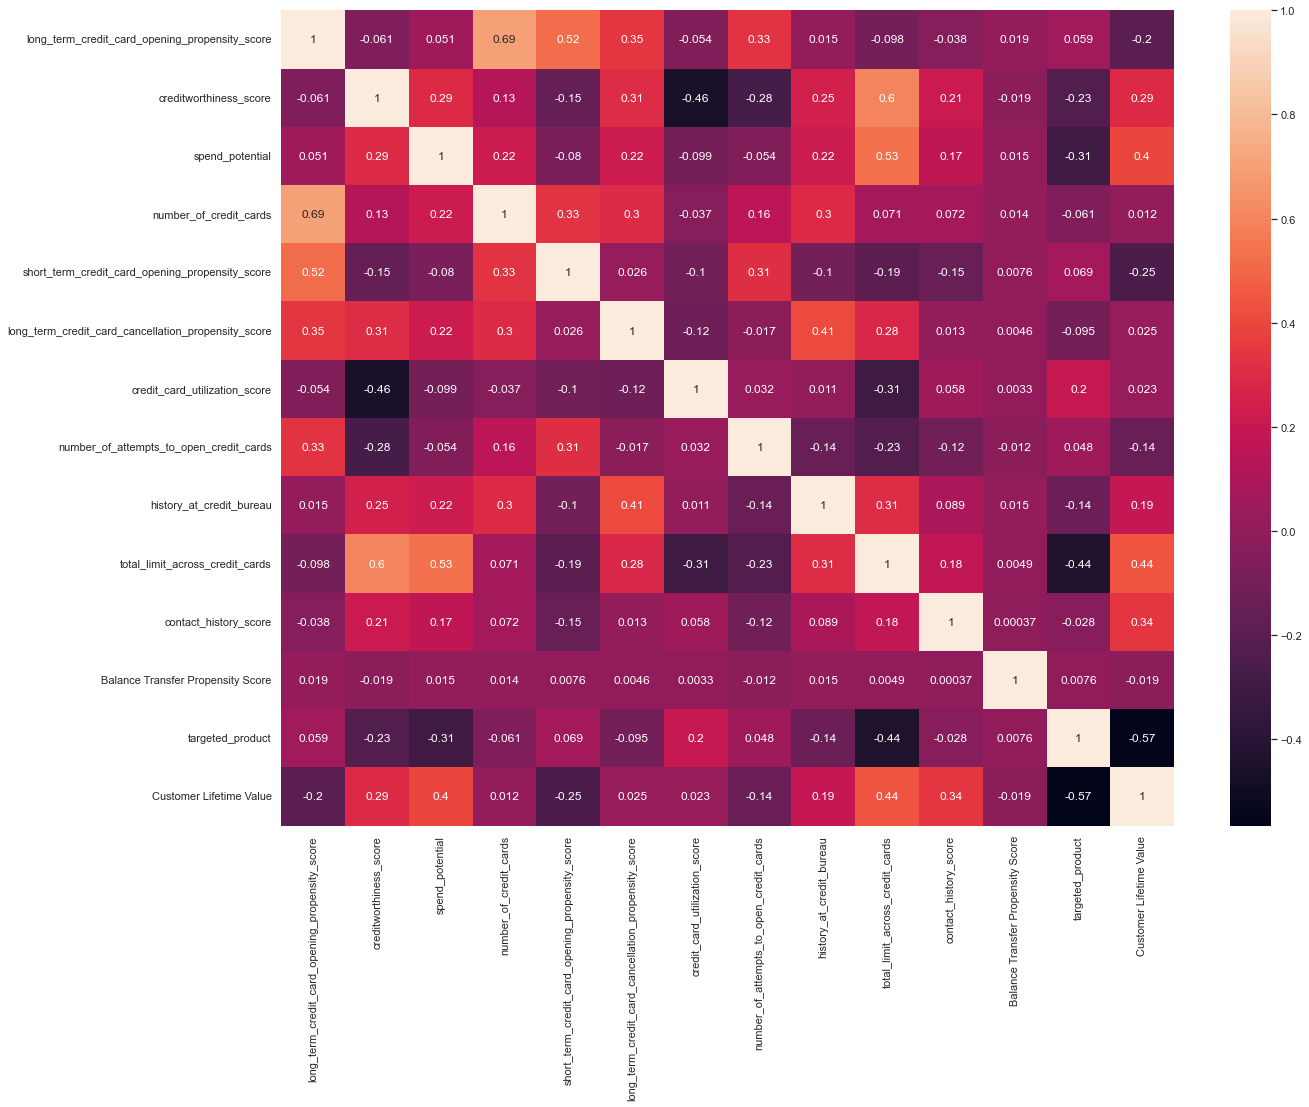

In [404]:
sns.set(rc={'figure.figsize':(20,15)})
corr_m = sns.heatmap(base_data[base_data.columns[1:-5]].corr(), annot=True)
plt.savefig('2.png')

# PAST CAMPAIGN DATA

In [405]:
past_dt1 = pd.read_csv('Past_Campaign_Data.csv')

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [406]:
past_dt1.head()

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Applied for the card,Approved for the card,Sampling Factor
0,1.0,18.2,10506.5,11.8,330.0,0.0,0.0,1.2,0.0,38.0,3500.0,225,6,A,1,1,1
1,2.0,0.0,10298.7,5.4,99.0,0.0,0.0,7.8,0.0,35.0,2325.0,780,47,A,1,1,1
2,3.0,3.0,10220.8,0.5,66.0,3.0,2.6,NaN,8.0,34.0,2250.0,390,50,A,1,1,1
3,4.0,0.0,9714.3,0.0,33.0,0.0,5.2,3.7,4.0,54.0,8250.0,30,62,A,1,1,1
4,5.0,15.2,10064.9,8.3,132.0,6.1,1.3,2.5,4.0,24.0,4950.0,480,5,A,1,1,1


In [407]:
past_dt1.dtypes

ID                                                      object
long_term_credit_card_opening_propensity_score         float64
creditworthiness_score                                 float64
spend_potential                                        float64
number_of_credit_cards                                 float64
short_term_credit_card_opening_propensity_score        float64
long_term_credit_card_cancellation_propensity_score    float64
credit_card_utilization_score                          float64
number_of_attempts_to_open_credit_cards                float64
history_at_credit_bureau                               float64
total_limit_across_credit_cards                        float64
contact_history_score                                    int64
Balance Transfer Propensity Score                        int64
targeted_product                                        object
Applied for the card                                     int64
Approved for the card                                  

In [408]:
past_dt1.isnull().sum()

ID                                                     87560
long_term_credit_card_opening_propensity_score          1498
creditworthiness_score                                   321
spend_potential                                        10254
number_of_credit_cards                                  1498
short_term_credit_card_opening_propensity_score         3124
long_term_credit_card_cancellation_propensity_score     1498
credit_card_utilization_score                           5970
number_of_attempts_to_open_credit_cards                  321
history_at_credit_bureau                                 321
total_limit_across_credit_cards                         1558
contact_history_score                                      0
Balance Transfer Propensity Score                          0
targeted_product                                           0
Applied for the card                                       0
Approved for the card                                      0
Sampling Factor         

In [409]:
past_dt=past_dt1[past_dt1.columns[1:]]

In [410]:
past_dt.head()

,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Applied for the card,Approved for the card,Sampling Factor
0,18.2,10506.5,11.8,330.0,0.0,0.0,1.2,0.0,38.0,3500.0,225,6,A,1,1,1
1,0.0,10298.7,5.4,99.0,0.0,0.0,7.8,0.0,35.0,2325.0,780,47,A,1,1,1
2,3.0,10220.8,0.5,66.0,3.0,2.6,NaN,8.0,34.0,2250.0,390,50,A,1,1,1
3,0.0,9714.3,0.0,33.0,0.0,5.2,3.7,4.0,54.0,8250.0,30,62,A,1,1,1
4,15.2,10064.9,8.3,132.0,6.1,1.3,2.5,4.0,24.0,4950.0,480,5,A,1,1,1


In [411]:
past_dt['targeted_product'].value_counts()

E    42361
B    24252
C    19421
A     7057
D     6909
Name: targeted_product, dtype: int64

In [412]:
past_dt['Applied for the card'].value_counts()

0    87560
1    12440
Name: Applied for the card, dtype: int64

In [413]:
past_dt['Approved for the card'].value_counts()

0    90450
1     9550
Name: Approved for the card, dtype: int64

In [414]:
past_dt['Sampling Factor '].value_counts()

100    87560
1      12440
Name: Sampling Factor , dtype: int64

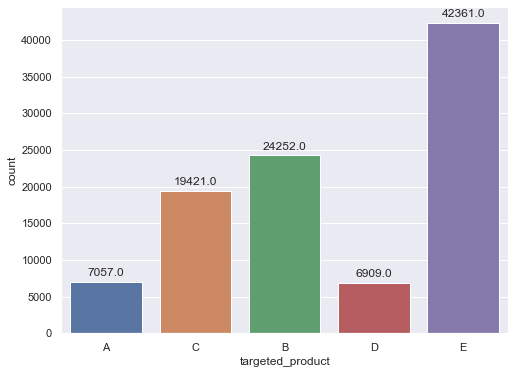

In [415]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='targeted_product', data=past_dt)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext=(0,9), textcoords='offset points')
plt.savefig('3.png')

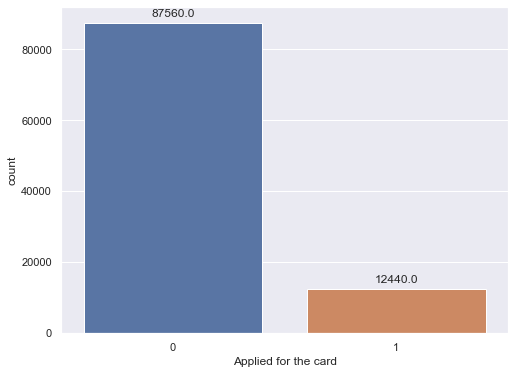

In [416]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Applied for the card', data=past_dt)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext=(0,9), textcoords='offset points')
plt.savefig('4.png')

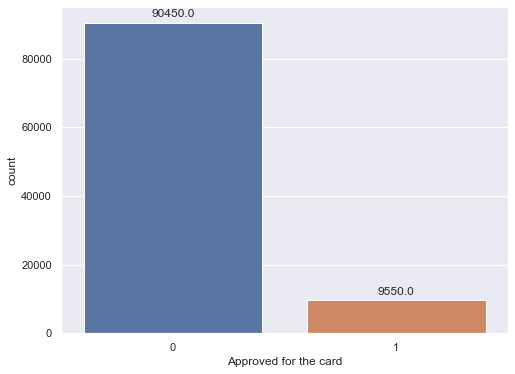

In [417]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Approved for the card', data=past_dt)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext=(0,9), textcoords='offset points')
plt.savefig('5.png')

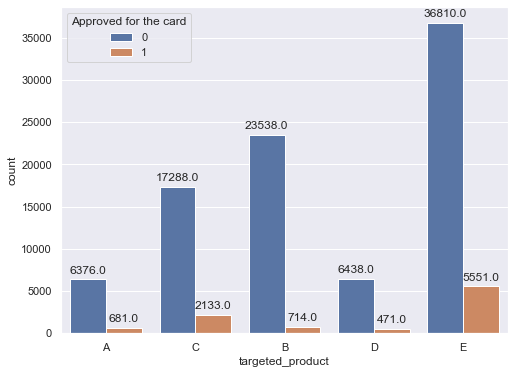

In [418]:
plt.figure(figsize=(8,6))
ax=sns.countplot(hue='Approved for the card', x='targeted_product', data=past_dt)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext=(0,9), textcoords='offset points')
plt.savefig('6.png')

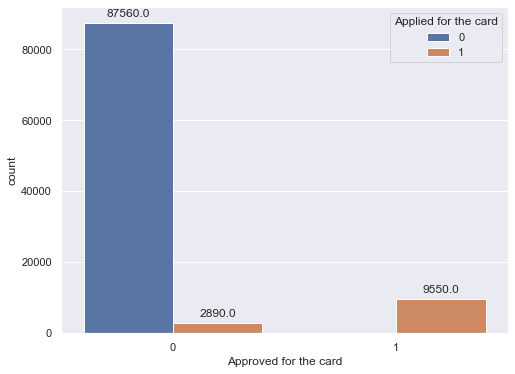

In [419]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Approved for the card', hue='Applied for the card', data=past_dt)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext=(0,9), textcoords='offset points')
plt.savefig('8.png')

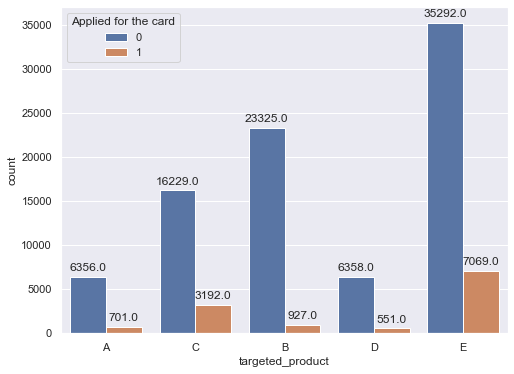

In [420]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='targeted_product', hue='Applied for the card', data=past_dt)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext=(0,9), textcoords='offset points')
plt.savefig('9.png')

In [421]:
a=0
b=0
c=0
for i in range(0, len(past_dt['targeted_product'])):
    ele = past_dt['targeted_product'][i]
    if ele == "A":
        a=a+past_dt['Sampling Factor '][i]
        b=b+past_dt['Applied for the card'][i]
        c=c+past_dt['Approved for the card'][i]
        
A_Response_likelihood = b/a
A_Approval_likelihood = c/b

print(A_Response_likelihood*100, A_Approval_likelihood*100)

0.11016798653467462 97.14693295292439


In [422]:
a=0
b=0
c=0
for i in range(0, len(past_dt['targeted_product'])):
    ele = past_dt['targeted_product'][i]
    if ele == "B":
        a=a+past_dt['Sampling Factor '][i]
        b=b+past_dt['Applied for the card'][i]
        c=c+past_dt['Approved for the card'][i]
        
B_Response_likelihood = b/a
B_Approval_likelihood = c/b

print(B_Response_likelihood*100, B_Approval_likelihood*100)

0.03972697667422208 77.02265372168284


In [423]:
a=0
b=0
c=0
for i in range(0, len(past_dt['targeted_product'])):
    ele = past_dt['targeted_product'][i]
    if ele == "C":
        a=a+past_dt['Sampling Factor '][i]
        b=b+past_dt['Applied for the card'][i]
        c=c+past_dt['Approved for the card'][i]
        
C_Response_likelihood = b/a
C_Approval_likelihood = c/b

print(C_Response_likelihood*100, C_Approval_likelihood*100)

0.19629885639926892 66.82330827067669


In [424]:
a=0
b=0
c=0
for i in range(0, len(past_dt['targeted_product'])):
    ele = past_dt['targeted_product'][i]
    if ele == "D":
        a=a+past_dt['Sampling Factor '][i]
        b=b+past_dt['Applied for the card'][i]
        c=c+past_dt['Approved for the card'][i]
        
D_Response_likelihood = b/a
D_Approval_likelihood = c/b

print(D_Response_likelihood*100, D_Approval_likelihood*100)

0.0865874336647542 85.48094373865699


In [425]:
a=0
b=0
c=0
for i in range(0, len(past_dt['targeted_product'])):
    ele = past_dt['targeted_product'][i]
    if ele == "E":
        a=a+past_dt['Sampling Factor '][i]
        b=b+past_dt['Applied for the card'][i]
        c=c+past_dt['Approved for the card'][i]
        
E_Response_likelihood = b/a
E_Approval_likelihood = c/b

print(E_Response_likelihood*100, E_Approval_likelihood*100)

0.19989995105010394 78.52595840995897


In [426]:
for i in range(0, len(past_dt['targeted_product'])):
    CW = past_dt['creditworthiness_score'][i]
    CU = past_dt['credit_card_utilization_score'][i]
    SP = past_dt['spend_potential'][i]
    BT = past_dt['Balance Transfer Propensity Score'][i]
    CH = past_dt['contact_history_score'][i]
    TL = past_dt['total_limit_across_credit_cards'][i]
    HT = past_dt['history_at_credit_bureau'][i]
    NC = past_dt['number_of_credit_cards'][i]
    NOC = past_dt['number_of_attempts_to_open_credit_cards'][i]
    LCP = past_dt['long_term_credit_card_cancellation_propensity_score'][i]
    SOP = past_dt['short_term_credit_card_opening_propensity_score'][i]
    LOP = past_dt['long_term_credit_card_opening_propensity_score'][i]
    approval=past_dt['Approved for the card'][i]
    if approval==1:
        continue
    else:
        if (MAX_CW>=CW>=MIN_CW) and (MAX_HT>=HT>=MIN_HT) and (MAX_NC>=NC>=MIN_NC) and (MIN_CU<=CU<=MAX_CU) and (MAX_SP>=SP>=MIN_SP) and (MAX_BT>=BT>=MIN_BT) and (MAX_CH>=CH>=MIN_CH) and (MAX_TL>=TL>=MIN_TL) and (MAX_NOC>=NOC>=MIN_NOC) and (MAX_LCP>=LCP>=MIN_LCP) and (MAX_SOP>=SOP>=MIN_SOP) and (MAX_LOP>=LOP>=MIN_LOP):
            continue
        else:
            past_dt.at[i, 'targeted_product'] = 'X'

In [427]:
past_dt['targeted_product'].value_counts()

E    35902
B    21125
C    16117
X    13849
A     6826
D     6181
Name: targeted_product, dtype: int64

In [428]:
past_dt['targeted_product']=past_dt['targeted_product'].map(dict(A=1, B=2, C=3, D=4, E=5, X=6))

C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/1650482489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_dt['targeted_product']=past_dt['targeted_product'].map(dict(A=1, B=2, C=3, D=4, E=5, X=6))


In [429]:
past_dt11 = past_dt[past_dt['targeted_product']==1]
past_dt22 = past_dt[past_dt['targeted_product']==2]
past_dt33 = past_dt[past_dt['targeted_product']==3]
past_dt44 = past_dt[past_dt['targeted_product']==4]
past_dt55 = past_dt[past_dt['targeted_product']==5]
past_dt66 = past_dt[past_dt['targeted_product']==6]

In [430]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean', )

for elements in past_dt66.columns:
    past_dt66[elements] = imp_num.fit_transform(past_dt66[[elements]])

for elements in past_dt11.columns:
    past_dt11[elements] = imp_num.fit_transform(past_dt11[[elements]])
    
for elements in past_dt22.columns:
    past_dt22[elements] = imp_num.fit_transform(past_dt22[[elements]])
    
for elements in past_dt33.columns:
    past_dt33[elements] = imp_num.fit_transform(past_dt33[[elements]])
    
for elements in past_dt44.columns:
    past_dt44[elements] = imp_num.fit_transform(past_dt44[[elements]])
    
for elements in past_dt55.columns:
    past_dt55[elements] = imp_num.fit_transform(past_dt55[[elements]])

C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/3250969097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_dt66[elements] = imp_num.fit_transform(past_dt66[[elements]])
C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/3250969097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_dt66[elements] = imp_num.fit_transform(past_dt66[[elements]])
C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/3250969097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/3250969097.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_dt33[elements] = imp_num.fit_transform(past_dt33[[elements]])
C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/3250969097.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_dt33[elements] = imp_num.fit_transform(past_dt33[[elements]])
C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/3250969097.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [431]:
past_dt = pd.concat([past_dt11,past_dt22,past_dt33,past_dt44,past_dt55,past_dt66])

In [432]:
lst_A=[]
lst_B=[]
lst_C=[]
lst_D=[]
lst_E=[]
for i in range(len(past_dt['targeted_product'])):
    ele=past_dt['targeted_product'][i]
    if ele==1:
        lst_A.append(1)
        lst_B.append(0)
        lst_C.append(0)
        lst_D.append(0)
        lst_E.append(0)
    elif ele==2:
        lst_A.append(0)
        lst_B.append(1)
        lst_C.append(0)
        lst_D.append(0)
        lst_E.append(0)
    elif ele==3:
        lst_A.append(0)
        lst_B.append(0)
        lst_C.append(1)
        lst_D.append(0)
        lst_E.append(0)
    elif ele==4:
        lst_A.append(0)
        lst_B.append(0)
        lst_C.append(0)
        lst_D.append(1)
        lst_E.append(0)
    elif ele==5:
        lst_A.append(0)
        lst_B.append(0)
        lst_C.append(0)
        lst_D.append(0)
        lst_E.append(1)
    elif ele == 6:
        lst_A.append(0)
        lst_B.append(0)
        lst_C.append(0)
        lst_D.append(0)
        lst_E.append(0)

lstA=pd.DataFrame(lst_A, columns=(['T_A']))
lstB=pd.DataFrame(lst_B, columns=(['T_B']))
lstC=pd.DataFrame(lst_C, columns=(['T_C']))
lstD=pd.DataFrame(lst_D, columns=(['T_D']))
lstE=pd.DataFrame(lst_E, columns=(['T_E']))

past_dt = pd.concat([past_dt, lstA], axis=1)
past_dt = pd.concat([past_dt, lstB], axis=1)
past_dt = pd.concat([past_dt, lstC], axis=1)
past_dt = pd.concat([past_dt, lstD], axis=1)
past_dt = pd.concat([past_dt, lstE], axis=1)

In [433]:
XA = past_dt[past_dt.columns[:-9]]
yA = past_dt['T_A']

XB = past_dt[past_dt.columns[:-9]]
yB = past_dt['T_B']

XC = past_dt[past_dt.columns[:-9]]
yC = past_dt['T_C']

XD = past_dt[past_dt.columns[:-9]]
yD = past_dt['T_D']

XE = past_dt[past_dt.columns[:-9]]
yE = past_dt['T_E']

X = past_dt[cols]
y = past_dt['targeted_product']

In [434]:
scaler = MinMaxScaler()

scaledA = scaler.fit_transform(XA)
XA = pd.DataFrame(scaledA, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

scaledB = scaler.fit_transform(XB)
XB = pd.DataFrame(scaledB, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

scaledC = scaler.fit_transform(XC)
XC = pd.DataFrame(scaledC, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

scaledD = scaler.fit_transform(XD)
XD = pd.DataFrame(scaledD, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

scaledE = scaler.fit_transform(XE)
XE = pd.DataFrame(scaledE, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

In [435]:
yApred = knn_A.predict(XA)
print("kNN model accuracy:", metrics.accuracy_score(yA, yApred))
print(classification_report(yA, yApred))
confusion_matrix(yA, yApred)

kNN model accuracy: 0.91199
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     93174
           1       0.33      0.28      0.30      6826

    accuracy                           0.91    100000
   macro avg       0.64      0.62      0.63    100000
weighted avg       0.91      0.91      0.91    100000



array([[89311,  3863],
       [ 4938,  1888]], dtype=int64)

In [436]:
yBpred = knn_B.predict(XB)
print("kNN model accuracy:", metrics.accuracy_score(yB, yBpred))
print(classification_report(yB, yBpred))
confusion_matrix(yB, yBpred)

kNN model accuracy: 0.78438
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     78875
           1       0.37      0.03      0.06     21125

    accuracy                           0.78    100000
   macro avg       0.58      0.51      0.47    100000
weighted avg       0.70      0.78      0.70    100000



array([[77804,  1071],
       [20491,   634]], dtype=int64)

In [437]:
yCpred = knn_C.predict(XC)
print("kNN model accuracy:", metrics.accuracy_score(yC, yCpred))
print(classification_report(yC, yCpred))
confusion_matrix(yC, yCpred)

kNN model accuracy: 0.8537
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     83883
           1       0.61      0.25      0.35     16117

    accuracy                           0.85    100000
   macro avg       0.74      0.61      0.64    100000
weighted avg       0.83      0.85      0.83    100000



array([[81354,  2529],
       [12101,  4016]], dtype=int64)

In [438]:
yDpred = knn_D.predict(XD)
print("kNN model accuracy:", metrics.accuracy_score(yD, yDpred))
print(classification_report(yD, yDpred))
confusion_matrix(yD, yDpred)

kNN model accuracy: 0.89654
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     93819
           1       0.18      0.19      0.18      6181

    accuracy                           0.90    100000
   macro avg       0.56      0.57      0.56    100000
weighted avg       0.90      0.90      0.90    100000



array([[88493,  5326],
       [ 5020,  1161]], dtype=int64)

In [439]:
yEpred = knn_E.predict(XE)
print("kNN model accuracy:", metrics.accuracy_score(yE, yEpred))
print(yE.value_counts())
print(classification_report(yE, yEpred))
confusion_matrix(yE, yEpred)

kNN model accuracy: 0.64931
0    64098
1    35902
Name: T_E, dtype: int64
              precision    recall  f1-score   support

           0       0.68      0.86      0.76     64098
           1       0.52      0.27      0.36     35902

    accuracy                           0.65    100000
   macro avg       0.60      0.57      0.56    100000
weighted avg       0.62      0.65      0.61    100000



array([[55219,  8879],
       [26190,  9712]], dtype=int64)

In [440]:
yA_pred=pd.DataFrame(yApred, columns=['y_A'])
yB_pred=pd.DataFrame(yBpred, columns=['y_B'])
yC_pred=pd.DataFrame(yCpred, columns=['y_C'])
yD_pred=pd.DataFrame(yDpred, columns=['y_D'])
yE_pred=pd.DataFrame(yEpred, columns=['y_E'])

In [441]:
past_dt = pd.concat([past_dt, yA_pred, yB_pred, yC_pred, yD_pred, yE_pred], axis=1)

In [442]:
past_dt['targeted_product'].value_counts()

5.0    35902
2.0    21125
3.0    16117
6.0    13849
1.0     6826
4.0     6181
Name: targeted_product, dtype: int64

In [443]:
for i in range(0, len(past_dt['targeted_product'])):
    ele1 = past_dt['targeted_product'][i]
    ele2 = past_dt['Approved for the card'][i]
    
    eleta = past_dt['T_A'][i]
    eletb = past_dt['T_B'][i]
    eletc = past_dt['T_C'][i]
    eletd = past_dt['T_D'][i]
    elete = past_dt['T_E'][i]
    
    eleya = past_dt['y_A'][i]
    eleyb = past_dt['y_B'][i]
    eleyc = past_dt['y_C'][i]
    eleyd = past_dt['y_D'][i]
    eleye = past_dt['y_E'][i]
    
    listt = [eleta, eletb, eletc, eletd, elete]
    listy = [eleya, eleyb, eleyc, eleyd, eleye]
    if ele2==1:
        continue
    else:
        if listy.count(1) == 1:
            yi=listy.index(1)
            if 1 in listt:
                ti=listt.index(1)
                if yi == ti:
                    past_dt.at[i, 'targeted_product'] = yi+1
                else:
                    past_dt.at[i, 'targeted_product'] = 6
            else:
                past_dt.at[i, 'targeted_product'] = 6
        else:
            if 1 in listt:
                ti = listt.index(1)
                yele = listy[ti]
                if yele == 1:
                    past_dt.at[i, 'targeted_product'] = ti+1
                else:
                    past_dt.at[i, 'targeted_product'] = 6
            else:
                past_dt.at[i, 'targeted_product'] = 6

In [444]:
past_dt['targeted_product'].value_counts()

6.0    76137
5.0    13445
3.0     5191
1.0     2349
4.0     1552
2.0     1326
Name: targeted_product, dtype: int64

In [445]:
count=0
count1=0
for i in range(len(past_dt['y_E'])):
    eleee = past_dt['y_E'][i]
    eleeee = past_dt['T_E'][i]
    eleeeee = past_dt['Approved for the card'][i]
    if eleeee == 1:
        count1 = count1 + 1
    if (eleee==0) and (eleeee==1):
        count=count+1
        
print(count, count1)

26190 35902


In [446]:
past_dt['y_E'].value_counts()

0    81409
1    18591
Name: y_E, dtype: int64

In [447]:
#A Correct - 0=(Ac=93163 Pr=90843) 1=(Ac=6837 Pr=1767), Wrong - 0=(Ac=93163 Pr=2320) 1=(Ac=6837 Pr=5070)
#B Correct - 0=(Ac=78857 Pr=78846) 1=(Ac=21143 Pr=11), Wrong - 0=(Ac=78857 Pr=11) 1=(Ac=21143 Pr=21132)
#C Correct - 0=(Ac=83870 Pr=80371) 1=(Ac=16130 Pr=5077), Wrong - 0=(Ac=83870 Pr=3499) 1=(Ac=16130 Pr=11053)
#D Correct - 0=(Ac=93814 Pr=93714) 1=(Ac=6186 Pr=39), Wrong - 0=(Ac=93814 Pr=100) 1=(Ac=6186 Pr=6147)
#E Correct - 0=(Ac=64083 Pr=21216) 1=(Ac=35917 Pr=2308), Wrong - 0=(Ac=64083 Pr=42867) 1=(Ac=35917 Pr=33609)

In [448]:
#5.0    35917  33955 13145
#2.0    21143  724   1398
#3.0    16130  6040  5049
#6.0    13787  56522 76434
#1.0     6837  2259  2363
#4.0     6186  500   1611

In [449]:
dt_past = pd.concat([past_dt11,past_dt22,past_dt33,past_dt44,past_dt55])

In [450]:
dt_past=dt_past.reset_index(drop=True)

In [451]:
Xp = dt_past[cols]
yp = dt_past['targeted_product']

In [452]:
scaledp = scaler.fit_transform(Xp)
Xp = pd.DataFrame(scaledp, columns = ['long_term_credit_card_opening_propensity_score', 'creditworthiness_score', 'spend_potential', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'Balance Transfer Propensity Score'])

In [453]:
yp_pred = knn.predict(Xp)
print("kNN model accuracy:", metrics.accuracy_score(yp, yp_pred))
print(classification_report(yp, yp_pred))
confusion_matrix(yp, yp_pred)

kNN model accuracy: 0.4029088460958085
              precision    recall  f1-score   support

         1.0       0.22      0.70      0.34      6826
         2.0       0.33      0.17      0.23     21125
         3.0       0.55      0.35      0.43     16117
         4.0       0.14      0.20      0.16      6181
         5.0       0.56      0.54      0.55     35902

    accuracy                           0.40     86151
   macro avg       0.36      0.39      0.34     86151
weighted avg       0.44      0.40      0.40     86151



array([[ 4808,   240,    15,   401,  1362],
       [ 3902,  3636,  2667,  2730,  8190],
       [ 3136,  2204,  5720,  1288,  3769],
       [ 1793,   924,   442,  1212,  1810],
       [ 7808,  4095,  1618,  3046, 19335]], dtype=int64)

In [454]:
gnb_predictions_p = gnb.predict(Xp)
print("kNN model accuracy:", metrics.accuracy_score(yp, gnb_predictions_p))
print(classification_report(yp, gnb_predictions_p))
confusion_matrix(yp, gnb_predictions_p)

kNN model accuracy: 0.41592088310060243
              precision    recall  f1-score   support

         1.0       0.25      0.69      0.37      6826
         2.0       0.39      0.17      0.24     21125
         3.0       0.51      0.37      0.43     16117
         4.0       0.10      0.18      0.13      6181
         5.0       0.58      0.57      0.57     35902

    accuracy                           0.42     86151
   macro avg       0.37      0.40      0.35     86151
weighted avg       0.46      0.42      0.42     86151



array([[ 4730,   418,    10,   871,   797],
       [ 3781,  3587,  2779,  2950,  8028],
       [ 3164,  1391,  5924,  1327,  4311],
       [ 1416,  1050,   679,  1140,  1896],
       [ 5610,  2789,  2198,  4854, 20451]], dtype=int64)

In [455]:
prediction_p = svc.predict(Xp)
print("svc model accuracy:", metrics.accuracy_score(yp, prediction_p))
print(classification_report(yp, prediction_p))
confusion_matrix(yp, prediction_p)

svc model accuracy: 0.41842810878573666
              precision    recall  f1-score   support

         1.0       0.24      0.74      0.36      6826
         2.0       0.34      0.11      0.16     21125
         3.0       0.58      0.35      0.44     16117
         4.0       0.15      0.29      0.20      6181
         5.0       0.58      0.59      0.59     35902

    accuracy                           0.42     86151
   macro avg       0.38      0.42      0.35     86151
weighted avg       0.46      0.42      0.41     86151



array([[ 5020,    71,     5,   610,  1120],
       [ 4119,  2247,  2429,  3964,  8366],
       [ 3287,  1426,  5703,  1662,  4039],
       [ 1670,   505,   401,  1805,  1800],
       [ 6914,  2299,  1363,  4053, 21273]], dtype=int64)

In [456]:
y_pred_logit_p = model.predict(Xp)
print("Logit model accuracy:", metrics.accuracy_score(yp, y_pred_logit_p))
print(classification_report(yp, y_pred_logit_p))
confusion_matrix(yp, y_pred_logit_p)

Logit model accuracy: 0.3370129191767942
              precision    recall  f1-score   support

         1.0       0.23      0.73      0.35      6826
         2.0       0.33      0.11      0.16     21125
         3.0       0.49      0.43      0.46     16117
         4.0       0.11      0.42      0.17      6181
         5.0       0.63      0.34      0.44     35902

    accuracy                           0.34     86151
   macro avg       0.36      0.41      0.32     86151
weighted avg       0.46      0.34      0.35     86151



array([[ 4974,   178,    32,  1144,   498],
       [ 4090,  2269,  3882,  7107,  3777],
       [ 3315,  1180,  6990,  2479,  2153],
       [ 1690,   478,   725,  2589,   699],
       [ 7838,  2776,  2712, 10364, 12212]], dtype=int64)

In [457]:
X_p = dt_past[dt_past.columns[:-4]]
y_p = dt_past['targeted_product']
scaledp = scaler.fit_transform(X_p)
X_p = pd.DataFrame(scaledp, columns = ['long_term_credit_card_opening_propensity_score','creditworthiness_score', 'spend_potential', 'number_of_credit_cards', 'short_term_credit_card_opening_propensity_score', 'long_term_credit_card_cancellation_propensity_score', 'credit_card_utilization_score', 'number_of_attempts_to_open_credit_cards', 'history_at_credit_bureau', 'total_limit_across_credit_cards', 'contact_history_score', 'Balance Transfer Propensity Score'])

In [458]:
y_pred = knn_m.predict(X_p)
print("kNN model accuracy:", metrics.accuracy_score(y_p, y_pred))
print(classification_report(y_p, y_pred))
confusion_matrix(y_p, y_pred)

kNN model accuracy: 0.40872421678216153
              precision    recall  f1-score   support

         1.0       0.24      0.68      0.35      6826
         2.0       0.36      0.24      0.29     21125
         3.0       0.56      0.39      0.46     16117
         4.0       0.16      0.34      0.22      6181
         5.0       0.61      0.48      0.54     35902

    accuracy                           0.41     86151
   macro avg       0.39      0.43      0.37     86151
weighted avg       0.48      0.41      0.42     86151



array([[ 4655,   331,    18,   964,   858],
       [ 4109,  4980,  2330,  3702,  6004],
       [ 2577,  2417,  6233,  2077,  2813],
       [ 1481,   890,   387,  2128,  1295],
       [ 6863,  5063,  2130,  4630, 17216]], dtype=int64)

In [459]:
gnb_predictions_p = gnb_m.predict(X_p)
print("naive model accuracy:", metrics.accuracy_score(y_p, gnb_predictions_p))
print(classification_report(y_p, gnb_predictions_p))
confusion_matrix(y_p, gnb_predictions_p)

naive model accuracy: 0.41772004968021265
              precision    recall  f1-score   support

         1.0       0.26      0.72      0.39      6826
         2.0       0.48      0.14      0.22     21125
         3.0       0.49      0.43      0.46     16117
         4.0       0.13      0.32      0.18      6181
         5.0       0.60      0.53      0.57     35902

    accuracy                           0.42     86151
   macro avg       0.39      0.43      0.36     86151
weighted avg       0.49      0.42      0.42     86151



array([[ 4937,   230,     8,  1001,   650],
       [ 4368,  2946,  2606,  4319,  6886],
       [ 2980,   964,  6994,  1761,  3418],
       [ 1426,   449,   756,  1994,  1556],
       [ 4990,  1503,  3827,  6466, 19116]], dtype=int64)

In [460]:
prediction_p = svc_m.predict(X_p)
print("svc model accuracy:", metrics.accuracy_score(y_p, prediction_p))
print(classification_report(y_p, prediction_p))
confusion_matrix(y_p, prediction_p)

svc model accuracy: 0.4491068008496709
              precision    recall  f1-score   support

         1.0       0.26      0.67      0.38      6826
         2.0       0.48      0.17      0.25     21125
         3.0       0.67      0.36      0.47     16117
         4.0       0.17      0.48      0.25      6181
         5.0       0.62      0.61      0.61     35902

    accuracy                           0.45     86151
   macro avg       0.44      0.46      0.39     86151
weighted avg       0.53      0.45      0.45     86151



array([[ 4564,   116,     2,  1325,   819],
       [ 4163,  3549,  1352,  4856,  7205],
       [ 2268,  1563,  5765,  2683,  3838],
       [ 1057,   423,   274,  2963,  1464],
       [ 5292,  1766,  1212,  5782, 21850]], dtype=int64)

In [461]:
y_pred_logit_p = model_m.predict(X_p)
print("Logit model accuracy:", metrics.accuracy_score(y_p, y_pred_logit_p))
print(classification_report(y_p, y_pred_logit_p))
confusion_matrix(y_p, y_pred_logit_p)

Logit model accuracy: 0.39617648083017026
              precision    recall  f1-score   support

         1.0       0.28      0.69      0.40      6826
         2.0       0.44      0.13      0.20     21125
         3.0       0.57      0.42      0.49     16117
         4.0       0.13      0.51      0.20      6181
         5.0       0.64      0.47      0.54     35902

    accuracy                           0.40     86151
   macro avg       0.41      0.44      0.37     86151
weighted avg       0.51      0.40      0.41     86151



array([[ 4731,   136,    12,  1319,   628],
       [ 3590,  2699,  2394,  7473,  4969],
       [ 2350,  1010,  6819,  3088,  2850],
       [ 1267,   424,   440,  3173,   877],
       [ 4825,  1909,  2274, 10185, 16709]], dtype=int64)

In [462]:
"""mean_cred_worth_score=dt_past['creditworthiness_score'].mean()
std_cred_worth_score=dt_past['creditworthiness_score'].std()
mean_cred_util_score=dt_past['credit_card_utilization_score'].mean()
std_cred_util_score=dt_past['credit_card_utilization_score'].std()
mean_spend_potential=dt_past['spend_potential'].mean()
std_spend_potential=dt_past['spend_potential'].std()

MIN_CW=dt_past['creditworthiness_score'].min()
MAX_CU=dt_past['credit_card_utilization_score'].max()
AVG_SP=dt_past['spend_potential'].mean()
AV_PP = dt_past['long_term_credit_card_cancellation_propensity_score'].mean()

CW1 = mean_cred_worth_score - std_cred_worth_score
CW2 = mean_cred_worth_score + std_cred_worth_score

CU1 = mean_cred_util_score - std_cred_util_score
CU2 = mean_cred_util_score + std_cred_util_score

SP1 = mean_spend_potential - std_spend_potential
SP2 = mean_spend_potential + std_spend_potential
print(MIN_CW, MAX_CU, AVG_SP, AV_PP)"""

"mean_cred_worth_score=dt_past['creditworthiness_score'].mean()\nstd_cred_worth_score=dt_past['creditworthiness_score'].std()\nmean_cred_util_score=dt_past['credit_card_utilization_score'].mean()\nstd_cred_util_score=dt_past['credit_card_utilization_score'].std()\nmean_spend_potential=dt_past['spend_potential'].mean()\nstd_spend_potential=dt_past['spend_potential'].std()\n\nMIN_CW=dt_past['creditworthiness_score'].min()\nMAX_CU=dt_past['credit_card_utilization_score'].max()\nAVG_SP=dt_past['spend_potential'].mean()\nAV_PP = dt_past['long_term_credit_card_cancellation_propensity_score'].mean()\n\nCW1 = mean_cred_worth_score - std_cred_worth_score\nCW2 = mean_cred_worth_score + std_cred_worth_score\n\nCU1 = mean_cred_util_score - std_cred_util_score\nCU2 = mean_cred_util_score + std_cred_util_score\n\nSP1 = mean_spend_potential - std_spend_potential\nSP2 = mean_spend_potential + std_spend_potential\nprint(MIN_CW, MAX_CU, AVG_SP, AV_PP)"

In [463]:
past = past_dt

In [464]:
cols1 = ['long_term_credit_card_opening_propensity_score',
 'creditworthiness_score',
 'spend_potential',
 'short_term_credit_card_opening_propensity_score',
 'long_term_credit_card_cancellation_propensity_score',
 'credit_card_utilization_score',
 'number_of_attempts_to_open_credit_cards',
 'history_at_credit_bureau',
 'total_limit_across_credit_cards',
 'contact_history_score',
 'Balance Transfer Propensity Score']

Q1 = past_dt[cols1].quantile(0.25)
Q3 = past_dt[cols1].quantile(0.75)
IQR = Q3 - Q1

past_dt = past_dt[~((past_dt[cols] < (Q1 - 1.5 * IQR)) |(past_dt[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/2690460398.py:17: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  past_dt = past_dt[~((past_dt[cols] < (Q1 - 1.5 * IQR)) |(past_dt[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [465]:
#past_dt = past

In [466]:
past_dt=past_dt.reset_index(drop=True)

In [467]:
l = past_dt['targeted_product'].value_counts()

In [468]:
sam = min(l)
l

6.0    57930
5.0    11582
3.0     4549
1.0     1493
4.0     1310
2.0     1162
Name: targeted_product, dtype: int64

In [469]:
pdf1 = past_dt[past_dt.targeted_product == 1].sample(sam)
pdf2 = past_dt[past_dt.targeted_product == 2].sample(sam)
pdf3 = past_dt[past_dt.targeted_product == 3].sample(sam)
pdf4 = past_dt[past_dt.targeted_product == 4].sample(sam)
pdf5 = past_dt[past_dt.targeted_product == 5].sample(sam)
pdf6 = past_dt[past_dt.targeted_product == 6].sample(sam)
past_dt = pd.concat([pdf1, pdf2, pdf3, pdf4, pdf5, pdf6])
past_dt

,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,...,T_A,T_B,T_C,T_D,T_E,y_A,y_B,y_C,y_D,y_E
42641,0.000000,10922.077920,0.852252,33.0,0.000000,3.896104,1.500000,0.0,39.416667,3500.0,...,1,0,0,0,0,1,0,0,0,0
40992,6.060606,10415.584420,6.780180,99.0,0.000000,0.000000,3.666667,12.0,29.333333,1300.0,...,1,0,0,0,0,1,0,0,0,0
38853,3.030303,10428.571430,15.404054,99.0,0.000000,1.298701,2.333333,8.0,37.666667,4325.0,...,1,0,0,0,0,1,0,0,0,0
40405,0.000000,10545.454550,7.984910,99.0,0.000000,0.000000,1.833333,12.0,34.083333,3200.0,...,1,0,0,0,0,1,0,0,0,0
377,6.060606,9922.077922,0.134234,99.0,3.030303,0.000000,0.666667,8.0,28.750000,1300.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10485,0.000000,10792.207790,0.000000,0.0,1.301485,2.597403,6.794771,0.0,40.666667,1250.0,...,0,0,0,0,0,1,0,0,0,0
25829,6.060606,9805.194805,7.406081,132.0,6.060606,2.597403,2.333333,20.0,32.833333,2500.0,...,0,1,0,0,0,0,0,0,0,0
40373,0.000000,9480.519481,4.634685,132.0,0.000000,6.493506,3.166667,20.0,45.083333,2200.0,...,1,0,0,0,0,0,0,0,0,1
45913,15.151515,9389.610390,4.588514,165.0,0.000000,6.493506,1.333333,36.0,49.250000,900.0,...,0,0,0,0,1,0,0,0,0,0


In [470]:
past_dt=past_dt.reset_index(drop=True)

In [471]:
past_dt.describe()

,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,...,T_A,T_B,T_C,T_D,T_E,y_A,y_B,y_C,y_D,y_E
count,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,...,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000,6972.000000
mean,5.660038,9434.695747,3.598172,106.013213,1.514267,1.907833,6.757069,14.218038,36.038562,1673.091425,...,0.176133,0.217298,0.190046,0.179432,0.223609,0.145295,0.087493,0.154188,0.146299,0.162220
std,4.528089,717.942443,3.617056,69.396316,2.015532,2.348427,4.461788,15.225411,10.214948,1613.176195,...,0.380961,0.412436,0.392365,0.383741,0.416693,0.352424,0.282576,0.361155,0.353432,0.368679
min,0.000000,8181.818182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.030303,8818.181818,0.883784,66.000000,0.000000,0.000000,2.833333,4.000000,27.500000,550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.060606,9396.103897,2.308333,99.000000,0.000000,1.298701,6.333333,12.000000,35.000000,1150.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.090909,9935.064935,5.097860,132.000000,3.030303,2.597403,9.833333,20.000000,42.416667,2225.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,18.181818,10948.051950,16.453153,759.000000,6.100000,9.100000,18.833333,164.000000,75.833333,19150.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [472]:
past_dt.isnull().sum()

long_term_credit_card_opening_propensity_score         0
creditworthiness_score                                 0
spend_potential                                        0
number_of_credit_cards                                 0
short_term_credit_card_opening_propensity_score        0
long_term_credit_card_cancellation_propensity_score    0
credit_card_utilization_score                          0
number_of_attempts_to_open_credit_cards                0
history_at_credit_bureau                               0
total_limit_across_credit_cards                        0
contact_history_score                                  0
Balance Transfer Propensity Score                      0
targeted_product                                       0
Applied for the card                                   0
Approved for the card                                  0
Sampling Factor                                        0
T_A                                                    0
T_B                            

In [473]:
past_dt.skew()

long_term_credit_card_opening_propensity_score         0.790786
creditworthiness_score                                 0.258061
spend_potential                                        1.397953
number_of_credit_cards                                 1.444994
short_term_credit_card_opening_propensity_score        0.996120
long_term_credit_card_cancellation_propensity_score    1.288646
credit_card_utilization_score                          0.460690
number_of_attempts_to_open_credit_cards                2.407823
history_at_credit_bureau                               0.697767
total_limit_across_credit_cards                        2.156803
contact_history_score                                  1.587094
Balance Transfer Propensity Score                     -0.022015
targeted_product                                       0.000000
Applied for the card                                   0.665890
Approved for the card                                  0.779727
Sampling Factor                         

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

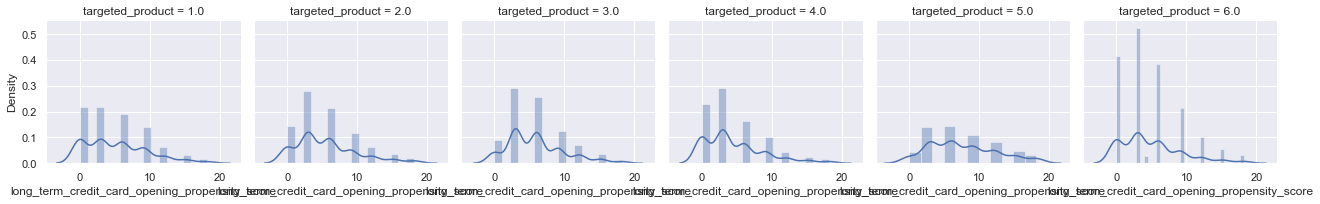

In [474]:
sns.set(rc={'figure.figsize':(25,8)})
g = sns.FacetGrid(past_dt, col='targeted_product')
g = g.map(sns.distplot, "long_term_credit_card_opening_propensity_score")
plt.savefig('10.png')

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


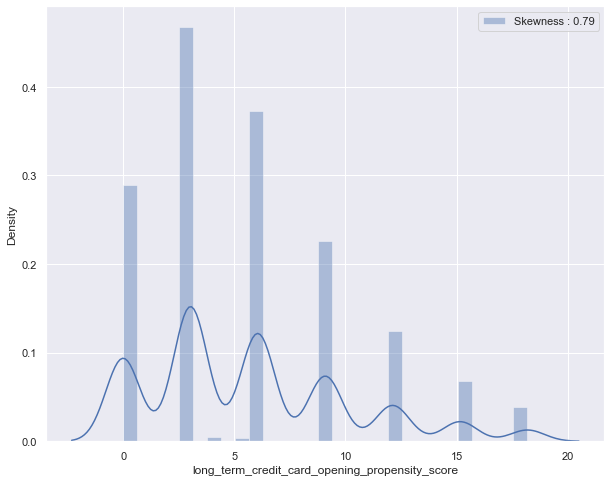

In [475]:
sns.set(rc={'figure.figsize':(10,8)})
g = sns.distplot(past_dt["long_term_credit_card_opening_propensity_score"], color="b", label="Skewness : %.2f"%(past_dt["long_term_credit_card_opening_propensity_score"].skew()))
g = g.legend(loc="best")
plt.savefig('11.png')

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


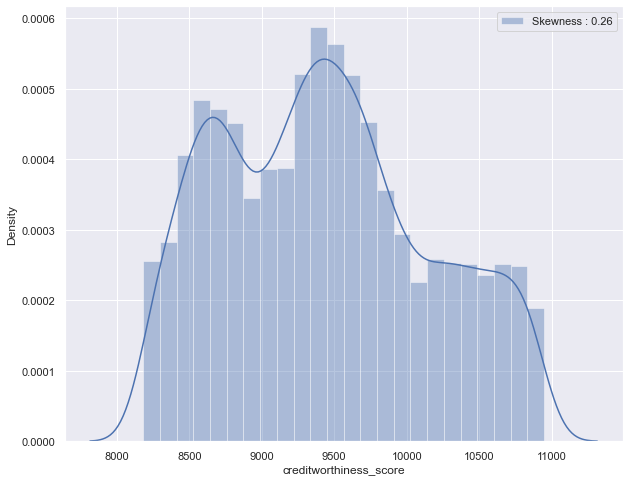

In [476]:
sns.set(rc={'figure.figsize':(10,8)})
g = sns.distplot(past_dt["creditworthiness_score"], color="b", label="Skewness : %.2f"%(past_dt["creditworthiness_score"].skew()))
g = g.legend(loc="best")
plt.savefig('12.png')

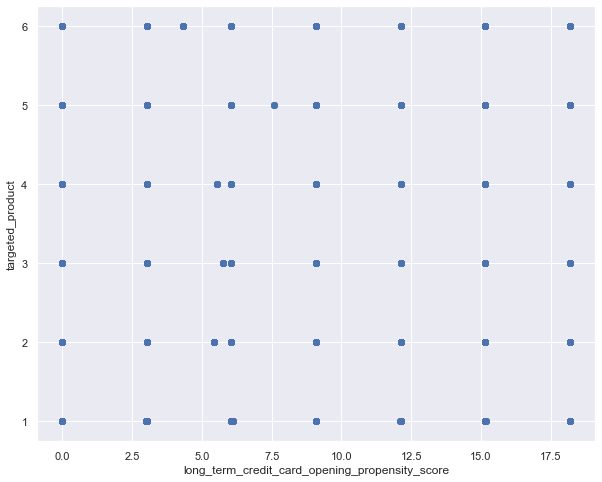

In [477]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['long_term_credit_card_opening_propensity_score'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('long_term_credit_card_opening_propensity_score')
plt.ylabel('targeted_product')
plt.savefig('13.png')

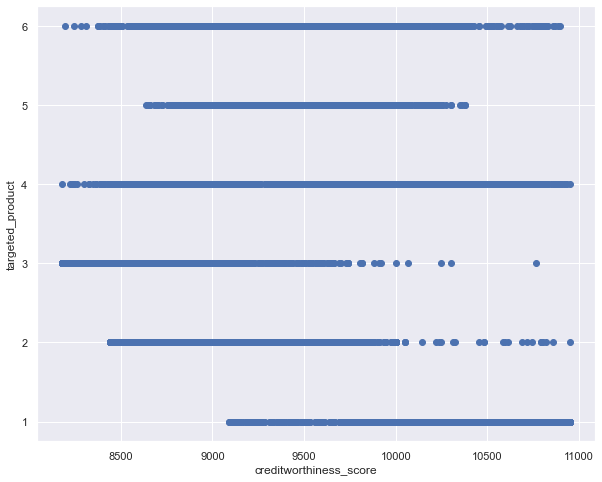

In [478]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['creditworthiness_score'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('creditworthiness_score')
plt.ylabel('targeted_product')
plt.savefig('14.png')

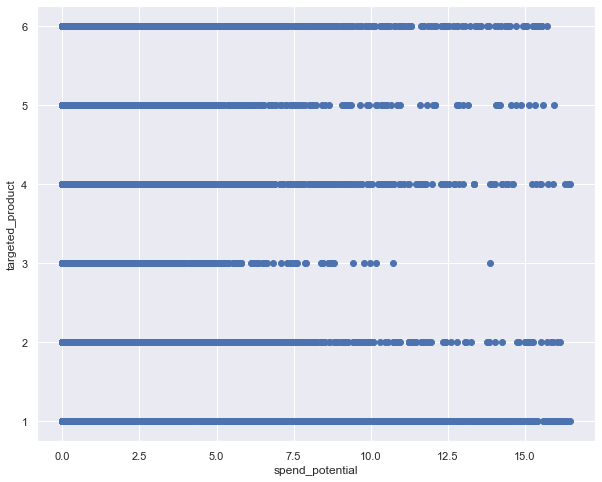

In [479]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['spend_potential'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('spend_potential')
plt.ylabel('targeted_product')
plt.savefig('15.png')

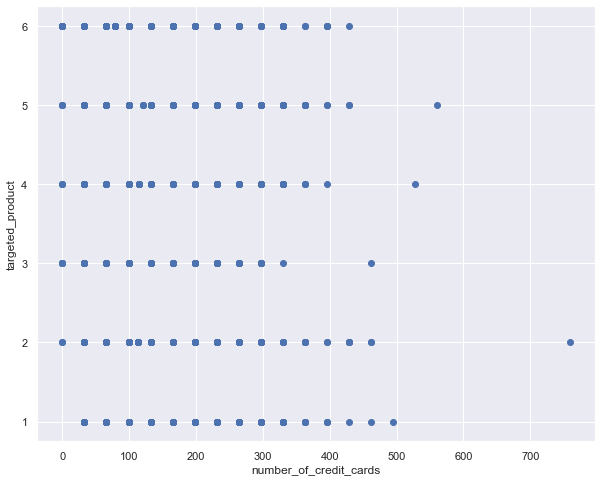

In [480]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['number_of_credit_cards'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('number_of_credit_cards')
plt.ylabel('targeted_product')
plt.savefig('16.png')

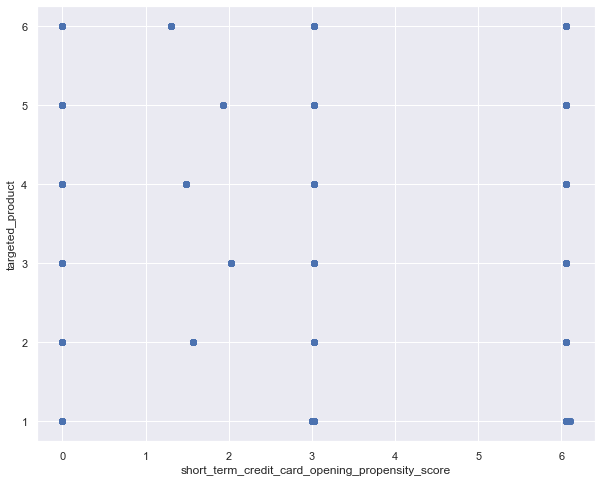

In [481]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['short_term_credit_card_opening_propensity_score'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('short_term_credit_card_opening_propensity_score')
plt.ylabel('targeted_product')
plt.savefig('17.png')

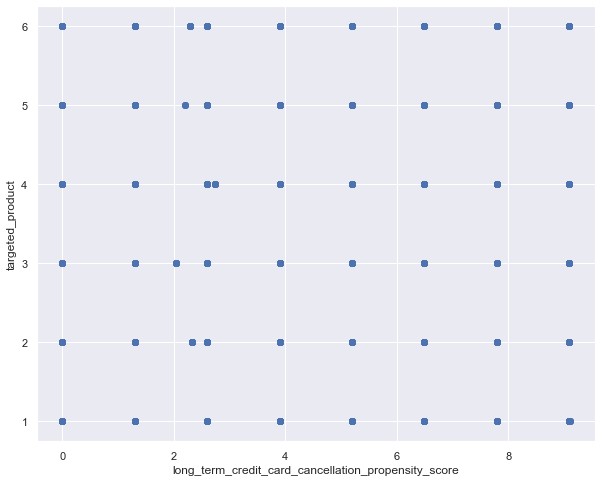

In [482]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['long_term_credit_card_cancellation_propensity_score'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('long_term_credit_card_cancellation_propensity_score')
plt.ylabel('targeted_product')
plt.savefig('18.png')

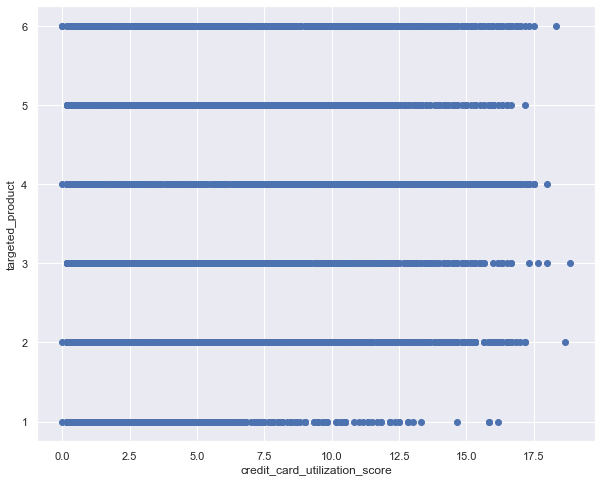

In [483]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['credit_card_utilization_score'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('credit_card_utilization_score')
plt.ylabel('targeted_product')
plt.savefig('19.png')

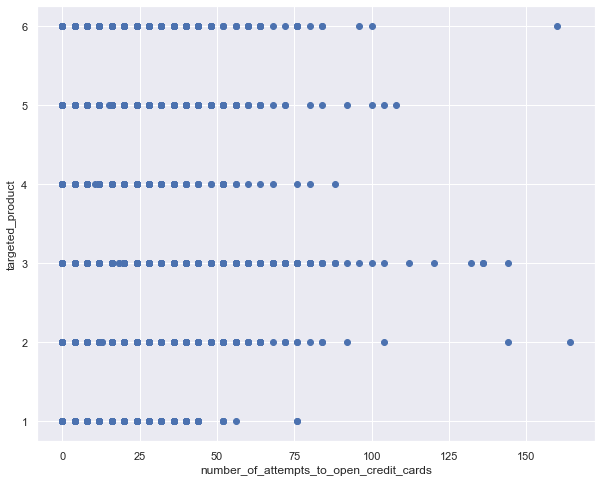

In [484]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['number_of_attempts_to_open_credit_cards'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('number_of_attempts_to_open_credit_cards')
plt.ylabel('targeted_product')
plt.savefig('20.png')

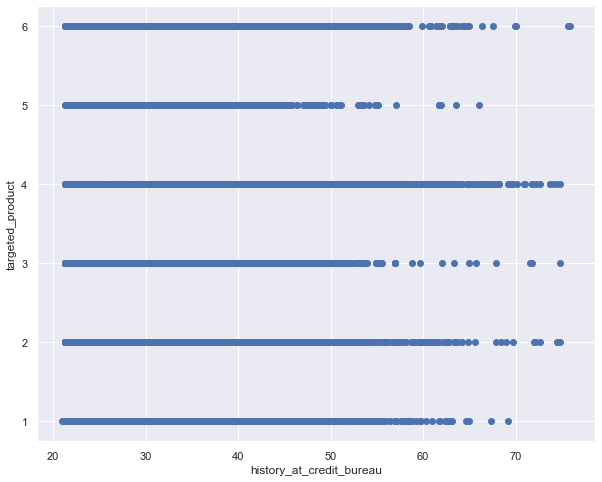

In [485]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['history_at_credit_bureau'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('history_at_credit_bureau')
plt.ylabel('targeted_product')
plt.savefig('21.png')

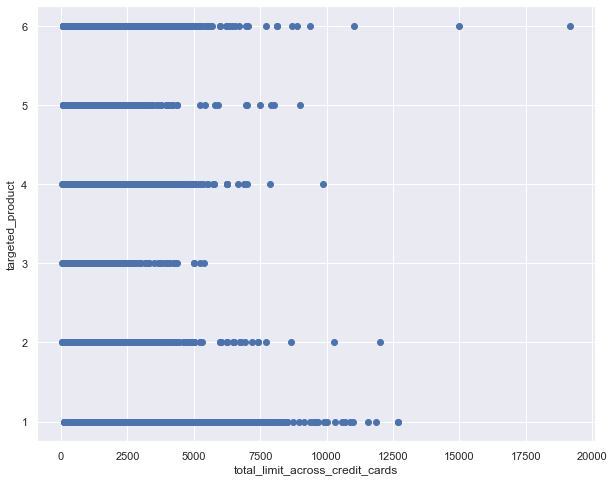

In [486]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['total_limit_across_credit_cards'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('total_limit_across_credit_cards')
plt.ylabel('targeted_product')
plt.savefig('22.png')

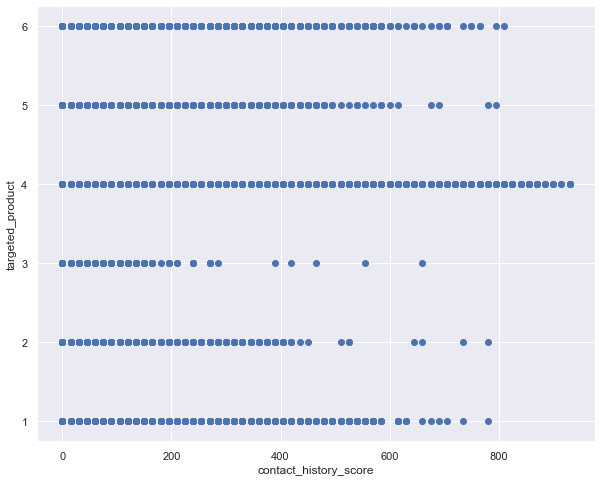

In [487]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['contact_history_score'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('contact_history_score')
plt.ylabel('targeted_product')
plt.savefig('23.png')

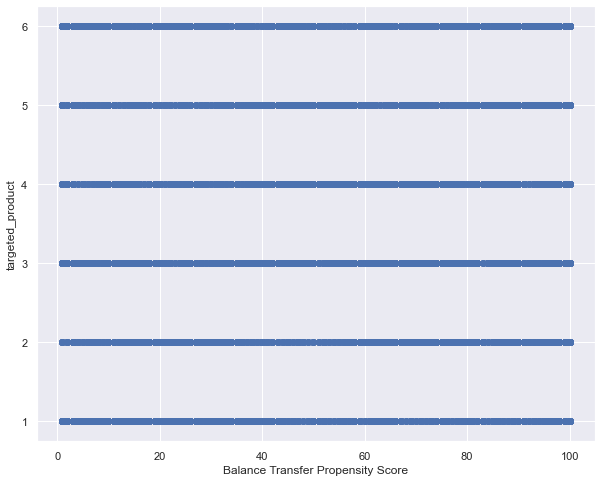

In [488]:
plt.figure(figsize=(10,8))
plt.scatter(past_dt['Balance Transfer Propensity Score'], past_dt['targeted_product'], cmap='winter')
plt.xlabel('Balance Transfer Propensity Score')
plt.ylabel('targeted_product')
plt.savefig('24.png')

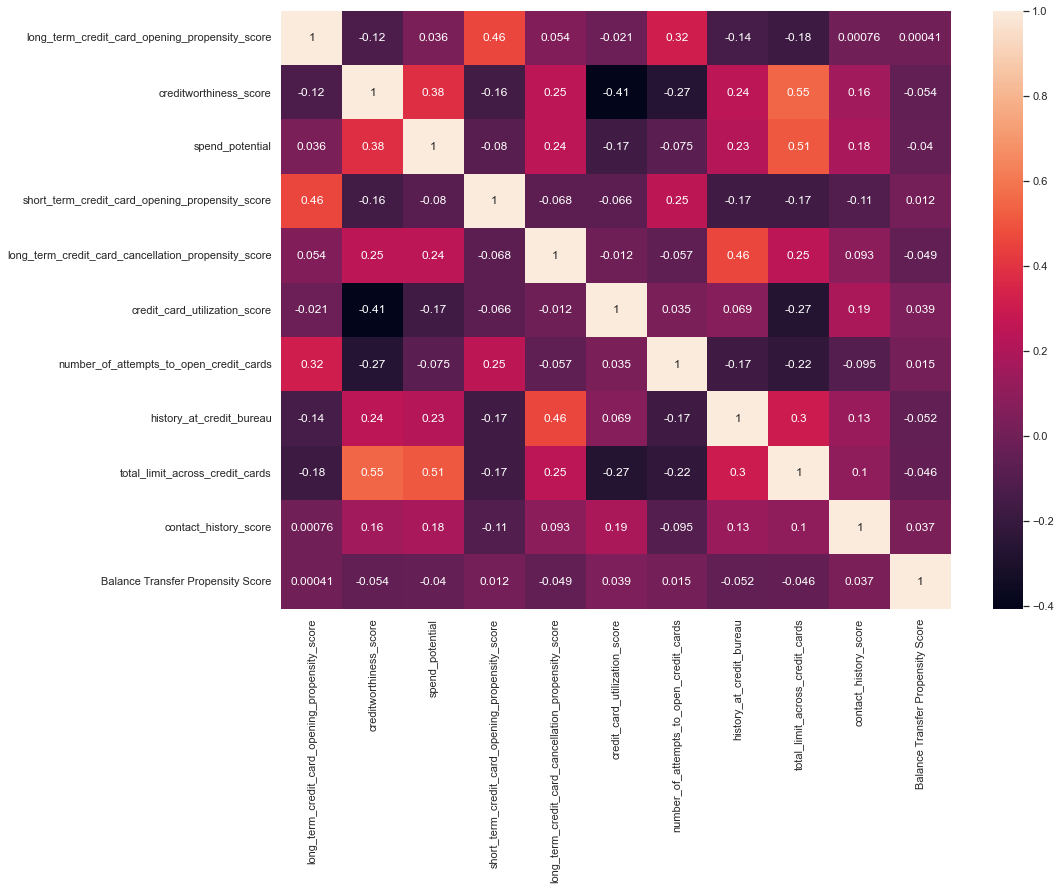

In [489]:
sns.set(rc={'figure.figsize':(15,11)})
corr_m = sns.heatmap(past_dt[cols1].corr(), annot=True)
plt.savefig('25.png')

In [490]:
X = past_dt[past_dt.columns[:12]]
y = past_dt['targeted_product']

In [491]:
X

,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score
0,0.000000,10922.077920,0.852252,33.0,0.000000,3.896104,1.500000,0.0,39.416667,3500.0,60.0,12.0
1,6.060606,10415.584420,6.780180,99.0,0.000000,0.000000,3.666667,12.0,29.333333,1300.0,480.0,89.0
2,3.030303,10428.571430,15.404054,99.0,0.000000,1.298701,2.333333,8.0,37.666667,4325.0,330.0,30.0
3,0.000000,10545.454550,7.984910,99.0,0.000000,0.000000,1.833333,12.0,34.083333,3200.0,30.0,38.0
4,6.060606,9922.077922,0.134234,99.0,3.030303,0.000000,0.666667,8.0,28.750000,1300.0,165.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6967,0.000000,10792.207790,0.000000,0.0,1.301485,2.597403,6.794771,0.0,40.666667,1250.0,390.0,28.0
6968,6.060606,9805.194805,7.406081,132.0,6.060606,2.597403,2.333333,20.0,32.833333,2500.0,270.0,25.0
6969,0.000000,9480.519481,4.634685,132.0,0.000000,6.493506,3.166667,20.0,45.083333,2200.0,0.0,76.0
6970,15.151515,9389.610390,4.588514,165.0,0.000000,6.493506,1.333333,36.0,49.250000,900.0,315.0,57.0


In [492]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'])
X

,A,B,C,D,E,F,G,H,I,J,K,L
0,0.000000,0.990610,0.051799,0.043478,0.000000,0.428143,0.079646,0.000000,0.335866,0.180628,0.064516,0.111111
1,0.333333,0.807512,0.412090,0.130435,0.000000,0.000000,0.194690,0.073171,0.151976,0.065445,0.516129,0.888889
2,0.166667,0.812207,0.936237,0.130435,0.000000,0.142714,0.123894,0.048780,0.303951,0.223822,0.354839,0.292929
3,0.000000,0.854460,0.485312,0.130435,0.000000,0.000000,0.097345,0.073171,0.238602,0.164921,0.032258,0.373737
4,0.333333,0.629108,0.008159,0.130435,0.496771,0.000000,0.035398,0.048780,0.141337,0.065445,0.177419,0.575758
...,...,...,...,...,...,...,...,...,...,...,...,...
6967,0.000000,0.943662,0.000000,0.000000,0.213358,0.285429,0.360784,0.000000,0.358663,0.062827,0.419355,0.272727
6968,0.333333,0.586854,0.450131,0.173913,0.993542,0.285429,0.123894,0.121951,0.215805,0.128272,0.290323,0.242424
6969,0.000000,0.469484,0.281690,0.173913,0.000000,0.713572,0.168142,0.121951,0.439210,0.112565,0.000000,0.757576
6970,0.833333,0.436620,0.278884,0.217391,0.000000,0.713572,0.070796,0.219512,0.515198,0.044503,0.338710,0.565657


In [493]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [494]:
print(X.shape)
print(y.shape)

(6972, 12)
(6972,)


In [495]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [496]:
y_pred = knn.predict(X_test)

In [497]:
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

kNN model accuracy: 0.6010430247718384
              precision    recall  f1-score   support

         1.0       0.67      0.85      0.75       355
         2.0       0.48      0.46      0.47       381
         3.0       0.67      0.82      0.74       401
         4.0       0.73      0.63      0.67       404
         5.0       0.55      0.67      0.60       392
         6.0       0.37      0.17      0.24       368

    accuracy                           0.60      2301
   macro avg       0.58      0.60      0.58      2301
weighted avg       0.58      0.60      0.58      2301



array([[302,  13,   2,   7,  19,  12],
       [ 13, 174,  82,  18,  62,  32],
       [  2,  35, 328,   8,  21,   7],
       [ 53,  34,  19, 253,  18,  27],
       [ 29,  42,  18,  11, 262,  30],
       [ 53,  64,  39,  50,  98,  64]], dtype=int64)

In [498]:
gnb = GaussianNB().fit(X_train, y_train)

In [499]:
gnb_predictions = gnb.predict(X_test)

In [500]:
print("naive model accuracy:", metrics.accuracy_score(y_test, gnb_predictions))
print(classification_report(y_test, gnb_predictions))
confusion_matrix(y_test, gnb_predictions)

naive model accuracy: 0.5254237288135594
              precision    recall  f1-score   support

         1.0       0.63      0.84      0.72       355
         2.0       0.42      0.20      0.27       381
         3.0       0.56      0.82      0.67       401
         4.0       0.57      0.53      0.55       404
         5.0       0.46      0.60      0.52       392
         6.0       0.32      0.14      0.20       368

    accuracy                           0.53      2301
   macro avg       0.49      0.52      0.49      2301
weighted avg       0.49      0.53      0.49      2301



array([[298,   6,   0,  17,  21,  13],
       [ 11,  76,  90,  43, 123,  38],
       [  3,  22, 330,  11,  28,   7],
       [ 74,  26,  40, 216,  25,  23],
       [ 25,  15,  63,  21, 237,  31],
       [ 61,  36,  66,  70,  83,  52]], dtype=int64)

In [501]:
svc = SVC().fit(X_train, y_train)

In [502]:
prediction = svc.predict(X_test)

In [503]:
print("svc model accuracy:", metrics.accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

svc model accuracy: 0.6462407648848327
              precision    recall  f1-score   support

         1.0       0.76      0.85      0.80       355
         2.0       0.55      0.50      0.52       381
         3.0       0.74      0.86      0.80       401
         4.0       0.78      0.72      0.75       404
         5.0       0.55      0.68      0.61       392
         6.0       0.41      0.25      0.31       368

    accuracy                           0.65      2301
   macro avg       0.63      0.64      0.63      2301
weighted avg       0.63      0.65      0.63      2301



array([[301,  12,   0,   9,  18,  15],
       [ 12, 192,  66,  14,  65,  32],
       [  1,  25, 346,   2,  23,   4],
       [ 25,  21,  15, 290,  15,  38],
       [ 16,  42,  13,   9, 266,  46],
       [ 43,  60,  27,  49,  97,  92]], dtype=int64)

In [504]:
model = LogisticRegression(solver='lbfgs', max_iter=1000000)
model.fit(X_train, y_train)
y_pred_logit = model.predict(X_test)
print("Logit model accuracy:", metrics.accuracy_score(y_test, y_pred_logit))
print(classification_report(y_test, y_pred_logit))
confusion_matrix(y_test, y_pred_logit)

Logit model accuracy: 0.5614950021729683
              precision    recall  f1-score   support

         1.0       0.69      0.85      0.76       355
         2.0       0.38      0.26      0.31       381
         3.0       0.69      0.84      0.76       401
         4.0       0.59      0.60      0.60       404
         5.0       0.48      0.63      0.54       392
         6.0       0.33      0.18      0.23       368

    accuracy                           0.56      2301
   macro avg       0.53      0.56      0.53      2301
weighted avg       0.53      0.56      0.54      2301



array([[301,  18,   0,  11,  13,  12],
       [ 18,  98,  85,  41, 109,  30],
       [  1,  21, 338,   2,  35,   4],
       [ 46,  28,  22, 244,  28,  36],
       [ 22,  41,   7,  28, 246,  48],
       [ 47,  51,  35,  88,  82,  65]], dtype=int64)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


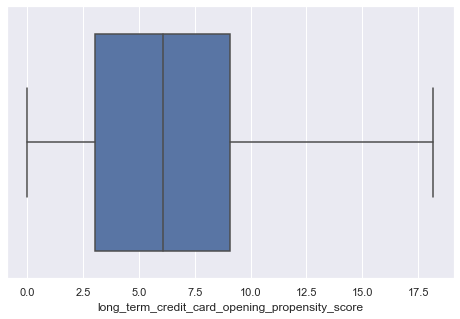

In [505]:
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(past_dt['long_term_credit_card_opening_propensity_score'])
plt.savefig('26.png')

In [506]:
cols2 = ['long_term_credit_card_opening_propensity_score',
 'creditworthiness_score',
 'spend_potential',
 'short_term_credit_card_opening_propensity_score',
 'long_term_credit_card_cancellation_propensity_score',
 'credit_card_utilization_score',
 'Balance Transfer Propensity Score']

In [507]:
X1 = past_dt[cols2]
y1 = past_dt['targeted_product']

In [508]:
X1

,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,Balance Transfer Propensity Score
0,0.000000,10922.077920,0.852252,0.000000,3.896104,1.500000,12.0
1,6.060606,10415.584420,6.780180,0.000000,0.000000,3.666667,89.0
2,3.030303,10428.571430,15.404054,0.000000,1.298701,2.333333,30.0
3,0.000000,10545.454550,7.984910,0.000000,0.000000,1.833333,38.0
4,6.060606,9922.077922,0.134234,3.030303,0.000000,0.666667,58.0
...,...,...,...,...,...,...,...
6967,0.000000,10792.207790,0.000000,1.301485,2.597403,6.794771,28.0
6968,6.060606,9805.194805,7.406081,6.060606,2.597403,2.333333,25.0
6969,0.000000,9480.519481,4.634685,0.000000,6.493506,3.166667,76.0
6970,15.151515,9389.610390,4.588514,0.000000,6.493506,1.333333,57.0


In [509]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=1)

In [510]:
print(X1.shape)
print(y1.shape)

(6972, 7)
(6972,)


In [511]:
knn_modified = KNeighborsClassifier(n_neighbors=20)
knn_modified.fit(X1_train, y1_train)

KNeighborsClassifier(n_neighbors=20)

In [512]:
y1_pred = knn_modified.predict(X1_test)

In [513]:
print("kNN_modified model accuracy:", metrics.accuracy_score(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred))
confusion_matrix(y1_test, y1_pred)

kNN_modified model accuracy: 0.43633202955236855
              precision    recall  f1-score   support

         1.0       0.59      0.74      0.66       355
         2.0       0.33      0.42      0.37       381
         3.0       0.67      0.65      0.66       401
         4.0       0.36      0.17      0.23       404
         5.0       0.35      0.50      0.41       392
         6.0       0.24      0.16      0.19       368

    accuracy                           0.44      2301
   macro avg       0.42      0.44      0.42      2301
weighted avg       0.42      0.44      0.42      2301



array([[261,  12,   1,  24,  29,  28],
       [  6, 159,  56,  33,  86,  41],
       [  1,  79, 260,  10,  36,  15],
       [ 98,  79,  37,  70,  83,  37],
       [ 24,  76,   8,  25, 196,  63],
       [ 49,  76,  25,  33, 127,  58]], dtype=int64)

In [514]:
gnb1_modified = GaussianNB().fit(X1_train, y1_train)
gnb1_predictions = gnb1_modified.predict(X1_test)
print("naive_modified model accuracy:", metrics.accuracy_score(y1_test, gnb1_predictions))
print(classification_report(y1_test, gnb1_predictions))
confusion_matrix(y1_test, gnb1_predictions)

naive_modified model accuracy: 0.4737070838765754
              precision    recall  f1-score   support

         1.0       0.60      0.84      0.70       355
         2.0       0.32      0.14      0.20       381
         3.0       0.53      0.75      0.62       401
         4.0       0.41      0.34      0.37       404
         5.0       0.44      0.66      0.53       392
         6.0       0.28      0.11      0.16       368

    accuracy                           0.47      2301
   macro avg       0.43      0.47      0.43      2301
weighted avg       0.43      0.47      0.43      2301



array([[299,  10,   1,  11,  25,   9],
       [ 14,  55, 112,  56, 115,  29],
       [  4,  26, 300,  26,  39,   6],
       [ 95,  27,  63, 136,  42,  41],
       [ 30,  23,  28,  31, 258,  22],
       [ 59,  29,  59,  73, 106,  42]], dtype=int64)

In [515]:
svc1_modified = SVC().fit(X1_train, y1_train)
svc1_prediction = svc1_modified.predict(X1_test)
print("svc_modified model accuracy:", metrics.accuracy_score(y1_test, svc1_prediction))
print(classification_report(y1_test, svc1_prediction))
confusion_matrix(y1_test, svc1_prediction)

svc_modified model accuracy: 0.37592351151673187
              precision    recall  f1-score   support

         1.0       0.52      0.80      0.63       355
         2.0       0.24      0.24      0.24       381
         3.0       0.51      0.82      0.63       401
         4.0       0.00      0.00      0.00       404
         5.0       0.00      0.00      0.00       392
         6.0       0.22      0.43      0.29       368

    accuracy                           0.38      2301
   macro avg       0.25      0.38      0.30      2301
weighted avg       0.24      0.38      0.29      2301



C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

array([[285,  13,   0,   0,   0,  57],
       [ 12,  93, 151,   0,   0, 125],
       [  2,  31, 329,   0,   0,  39],
       [134,  66,  89,   0,   0, 115],
       [ 35, 107,  12,   0,   0, 238],
       [ 75,  71,  64,   0,   0, 158]], dtype=int64)

In [516]:
model1 = LogisticRegression(solver='lbfgs', max_iter=1000000)
model1.fit(X1_train, y1_train)

LogisticRegression(max_iter=1000000)

In [517]:
y1_pred_logit = model1.predict(X1_test)

In [518]:
print("Logit model accuracy:", metrics.accuracy_score(y1_test, y1_pred_logit))
print(classification_report(y1_test, y1_pred_logit))
confusion_matrix(y1_test, y1_pred_logit)

Logit model accuracy: 0.3594089526292916
              precision    recall  f1-score   support

         1.0       0.51      0.82      0.63       355
         2.0       0.26      0.09      0.13       381
         3.0       0.32      0.28      0.30       401
         4.0       0.36      0.49      0.41       404
         5.0       0.32      0.38      0.34       392
         6.0       0.21      0.14      0.17       368

    accuracy                           0.36      2301
   macro avg       0.33      0.36      0.33      2301
weighted avg       0.33      0.36      0.33      2301



array([[290,  10,   8,  10,  18,  19],
       [ 60,  33,  84,  97,  69,  38],
       [ 43,  26, 111,  68, 119,  34],
       [ 74,  19,  20, 196,  40,  55],
       [ 42,  23,  72,  70, 147,  38],
       [ 64,  18,  54, 111,  71,  50]], dtype=int64)

In [519]:
from sklearn.metrics import mean_absolute_error
print("kNN MAE:", mean_absolute_error(y1_test, y1_pred))
print("Logit MAE:", mean_absolute_error(y1_test, y1_pred_logit))
print("Naive MAE:", mean_absolute_error(y1_test, gnb1_predictions))
print("SVC MAE:", mean_absolute_error(y1_test, svc1_prediction))

kNN MAE: 1.2998696219035202
Logit MAE: 1.3933072577140373
Naive MAE: 1.1773142112125163
SVC MAE: 1.5384615384615385


In [520]:
X

,A,B,C,D,E,F,G,H,I,J,K,L
0,0.000000,0.990610,0.051799,0.043478,0.000000,0.428143,0.079646,0.000000,0.335866,0.180628,0.064516,0.111111
1,0.333333,0.807512,0.412090,0.130435,0.000000,0.000000,0.194690,0.073171,0.151976,0.065445,0.516129,0.888889
2,0.166667,0.812207,0.936237,0.130435,0.000000,0.142714,0.123894,0.048780,0.303951,0.223822,0.354839,0.292929
3,0.000000,0.854460,0.485312,0.130435,0.000000,0.000000,0.097345,0.073171,0.238602,0.164921,0.032258,0.373737
4,0.333333,0.629108,0.008159,0.130435,0.496771,0.000000,0.035398,0.048780,0.141337,0.065445,0.177419,0.575758
...,...,...,...,...,...,...,...,...,...,...,...,...
6967,0.000000,0.943662,0.000000,0.000000,0.213358,0.285429,0.360784,0.000000,0.358663,0.062827,0.419355,0.272727
6968,0.333333,0.586854,0.450131,0.173913,0.993542,0.285429,0.123894,0.121951,0.215805,0.128272,0.290323,0.242424
6969,0.000000,0.469484,0.281690,0.173913,0.000000,0.713572,0.168142,0.121951,0.439210,0.112565,0.000000,0.757576
6970,0.833333,0.436620,0.278884,0.217391,0.000000,0.713572,0.070796,0.219512,0.515198,0.044503,0.338710,0.565657


In [521]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(X, y)

KNeighborsClassifier(n_neighbors=20)

In [522]:
logit_model = LogisticRegression(solver='lbfgs', max_iter=1000000)
logit_model.fit(X, y)

LogisticRegression(max_iter=1000000)

In [523]:
svc_model = SVC().fit(X, y)
svc_model.fit(X, y)

SVC()

In [524]:
naive_model = GaussianNB().fit(X_train, y_train)
naive_model.fit(X, y)

GaussianNB()

In [525]:
past_dt['targeted_product'].value_counts()

1.0    1162
2.0    1162
3.0    1162
4.0    1162
5.0    1162
6.0    1162
Name: targeted_product, dtype: int64

# Performance Data

In [526]:
perf_dt = pd.read_csv('Performance_of_Customers_Booked_from_Past_Campaign.csv')

In [527]:
perf_dt.head()

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
0,1,12.1,9168.8,5.8,165.0,3.0,15.6,7.0,20.0,51.0,525.0,60,14,C,787
1,2,3.0,8181.8,4.3,66.0,0.0,1.3,12.0,12.0,34.0,650.0,15,58,C,521
2,3,3.0,8883.1,0.3,33.0,3.0,0.0,12.0,12.0,36.0,250.0,105,72,E,1697
3,4,24.2,9272.7,1.6,198.0,3.0,10.4,7.0,104.0,41.0,500.0,75,88,E,1054
4,5,3.0,8779.2,1.9,66.0,0.0,0.0,6.0,12.0,37.0,225.0,45,4,C,1211


In [528]:
perf_dt['targeted_product']=perf_dt['targeted_product'].map(dict(A=1, B=2, C=3, D=4, E=5))

In [529]:
perf_dt11 = perf_dt[perf_dt['targeted_product']==1]
perf_dt22 = perf_dt[perf_dt['targeted_product']==2]
perf_dt33 = perf_dt[perf_dt['targeted_product']==3]
perf_dt44 = perf_dt[perf_dt['targeted_product']==4]
perf_dt55 = perf_dt[perf_dt['targeted_product']==5]

In [530]:
perf_dt.isnull().sum()

ID                                                        0
long_term_credit_card_opening_propensity_score          263
creditworthiness_score                                   56
spend_potential                                        2958
number_of_credit_cards                                  263
short_term_credit_card_opening_propensity_score         446
long_term_credit_card_cancellation_propensity_score     263
credit_card_utilization_score                          1041
number_of_attempts_to_open_credit_cards                  56
history_at_credit_bureau                                 56
total_limit_across_credit_cards                         235
contact_history_score                                     0
Balance Transfer Propensity Score                         0
targeted_product                                          0
Customer Lifetime Value                                   0
dtype: int64

In [531]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean', )

for elements in perf_dt11.columns:
    perf_dt11[elements] = imp_num.fit_transform(perf_dt11[[elements]])
    
for elements in perf_dt22.columns:
    perf_dt22[elements] = imp_num.fit_transform(perf_dt22[[elements]])
    
for elements in perf_dt33.columns:
    perf_dt33[elements] = imp_num.fit_transform(perf_dt33[[elements]])
    
for elements in perf_dt44.columns:
    perf_dt44[elements] = imp_num.fit_transform(perf_dt44[[elements]])
    
for elements in perf_dt55.columns:
    perf_dt55[elements] = imp_num.fit_transform(perf_dt55[[elements]])

C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/2007044090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_dt11[elements] = imp_num.fit_transform(perf_dt11[[elements]])
C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/2007044090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_dt11[elements] = imp_num.fit_transform(perf_dt11[[elements]])
C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/2007044090.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/2007044090.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_dt33[elements] = imp_num.fit_transform(perf_dt33[[elements]])
C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/2007044090.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perf_dt33[elements] = imp_num.fit_transform(perf_dt33[[elements]])
C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/2007044090.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [532]:
perf_dt = pd.concat([perf_dt11,perf_dt22,perf_dt33,perf_dt44,perf_dt55])

In [533]:
perf_dt11.describe()

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
count,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.000000,1833.0,1833.00000
mean,12392.061102,8.186885,10072.456823,11.048387,157.859016,1.871803,4.073333,3.919373,13.301310,37.704148,3661.557377,173.346972,49.457174,1.0,5441.39389
std,7209.489428,6.695234,522.160131,12.261300,96.186942,2.694510,4.731630,3.445489,12.074045,9.442415,1899.276869,165.206205,28.844967,0.0,2341.60007
min,7.000000,0.000000,9090.900000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,21.000000,75.000000,0.000000,1.000000,1.0,1392.00000
25%,6186.000000,3.000000,9662.300000,4.900000,99.000000,0.000000,0.000000,2.000000,4.000000,31.000000,2325.000000,45.000000,25.000000,1.0,4040.00000
50%,12333.000000,6.100000,10064.900000,8.200000,132.000000,0.000000,2.600000,3.000000,12.000000,37.000000,3375.000000,135.000000,49.000000,1.0,4809.00000
75%,18552.000000,12.100000,10493.500000,13.700000,198.000000,3.000000,6.500000,5.000000,20.000000,44.000000,4700.000000,255.000000,74.000000,1.0,6232.00000
max,24990.000000,72.700000,11039.000000,222.700000,792.000000,18.200000,46.800000,47.000000,128.000000,76.000000,18250.000000,1005.000000,100.000000,1.0,24532.00000


In [534]:
perf_dt22.describe()

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.0,1994.000000
mean,12712.816449,8.684205,9155.477974,3.937035,130.156425,2.920234,1.673692,7.370233,21.395161,33.305444,1318.667513,104.939819,49.534102,2.0,4352.749248
std,7128.152594,7.166471,483.625257,6.242218,99.266926,3.362060,2.857505,4.250923,19.433138,9.769005,1380.312867,116.399171,29.192135,0.0,2385.890317
min,6.000000,0.000000,8311.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,50.000000,0.000000,1.000000,2.0,232.000000
25%,6684.750000,3.000000,8753.200000,0.800000,66.000000,0.000000,0.000000,4.000000,8.000000,25.000000,500.000000,0.000000,24.000000,2.0,2715.250000
50%,12734.000000,6.100000,9129.900000,2.400000,99.000000,3.000000,0.000000,7.000000,16.000000,32.000000,925.000000,60.000000,49.000000,2.0,3884.000000
75%,19009.000000,12.100000,9467.500000,5.000000,165.000000,3.000000,2.600000,10.000000,28.000000,39.000000,1625.000000,165.000000,75.000000,2.0,5415.500000
max,24966.000000,63.600000,11039.000000,126.300000,759.000000,24.200000,35.100000,20.000000,176.000000,75.000000,25000.000000,795.000000,100.000000,2.0,19240.000000


In [535]:
perf_dt33.describe()

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
count,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.000000,5698.00000,5698.000000,5698.000000,5698.000000,5698.000000,5698.0,5698.000000
mean,12477.252194,8.801432,8791.306077,1.937605,116.051264,3.641368,1.476012,7.097587,26.67747,33.758147,632.985803,34.364689,50.922780,3.0,827.036153
std,7243.264468,7.270778,441.056039,2.913820,87.706995,3.801130,3.072102,4.193978,24.46558,9.684173,667.457159,67.664012,28.930148,0.0,606.596479
min,1.000000,0.000000,8181.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,21.000000,25.000000,0.000000,1.000000,3.0,-55.000000
25%,6168.750000,3.000000,8441.600000,0.600000,66.000000,0.000000,0.000000,4.000000,12.00000,25.000000,250.000000,0.000000,26.000000,3.0,425.000000
50%,12471.500000,6.100000,8701.300000,1.400000,99.000000,3.000000,0.000000,7.000000,20.00000,33.000000,450.000000,0.000000,51.000000,3.0,650.500000
75%,18797.750000,12.100000,9077.900000,2.000000,165.000000,6.100000,1.300000,10.000000,36.00000,40.000000,750.000000,45.000000,76.000000,3.0,1020.750000
max,25000.000000,124.200000,11039.000000,63.700000,957.000000,33.300000,97.400000,37.000000,284.00000,81.000000,10475.000000,810.000000,100.000000,3.0,6074.000000


In [536]:
perf_dt44.describe()

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
count,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.000000,1261.0,1261.000000
mean,12276.776368,8.053274,9376.026111,3.571836,130.025869,2.336059,3.555942,8.884680,14.768254,37.543651,1338.915858,167.581285,51.088025,4.0,2082.536875
std,7197.725240,8.234844,683.559231,5.056873,98.121221,2.932689,6.485850,4.871133,15.391822,9.887165,1264.963814,184.902319,28.357962,0.0,1772.626957
min,18.000000,0.000000,8220.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,50.000000,0.000000,1.000000,4.0,-862.000000
25%,6040.000000,3.000000,8792.200000,0.800000,66.000000,0.000000,0.000000,5.000000,4.000000,31.000000,425.000000,30.000000,28.000000,4.0,717.000000
50%,12066.000000,6.100000,9311.700000,2.200000,99.000000,2.336059,1.300000,8.884680,12.000000,37.000000,975.000000,105.000000,51.000000,4.0,1718.000000
75%,18484.000000,12.100000,9870.100000,4.200000,165.000000,3.000000,3.900000,13.000000,20.000000,43.000000,1875.000000,255.000000,75.000000,4.0,3208.000000
max,24989.000000,97.000000,11039.000000,66.800000,660.000000,18.200000,88.300000,18.000000,124.000000,73.000000,11250.000000,930.000000,100.000000,4.0,9955.000000


In [537]:
perf_dt55.describe()

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
count,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.000000,14214.0,14214.000000
mean,12513.866470,9.812005,9442.050736,2.646217,137.056679,2.916781,1.934812,6.602008,18.868861,31.551758,1072.724209,115.665893,50.321725,5.0,1582.225271
std,7221.684806,6.953007,386.589188,3.259238,95.857959,3.219384,3.298826,3.674171,17.450284,8.797373,952.421912,144.976330,28.951510,0.0,961.223513
min,3.000000,0.000000,8636.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,50.000000,0.000000,1.000000,5.0,-667.000000
25%,6253.250000,6.100000,9155.800000,0.800000,66.000000,0.000000,0.000000,4.000000,8.000000,24.000000,475.000000,0.000000,25.000000,5.0,838.000000
50%,12533.500000,9.100000,9415.600000,2.000000,132.000000,3.000000,0.000000,6.000000,16.000000,30.000000,825.000000,60.000000,50.000000,5.0,1435.000000
75%,18748.500000,12.100000,9688.300000,3.000000,198.000000,3.000000,2.600000,9.000000,28.000000,37.000000,1375.000000,180.000000,75.000000,5.0,2119.000000
max,24999.000000,63.600000,10389.600000,76.500000,924.000000,42.400000,58.400000,24.000000,248.000000,78.000000,14200.000000,1020.000000,100.000000,5.0,7688.000000


In [538]:
perf_dt.describe()

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000
mean,12500.500000,9.283858,9313.767062,3.250401,132.889354,2.976295,2.047982,6.694681,20.235049,32.947837,1195.355424,103.128000,50.371160,3.961160,1939.26952
std,7217.022701,7.122869,554.483453,5.337487,95.117364,3.356368,3.641177,4.009365,19.440352,9.404002,1281.794250,139.767661,28.929872,1.331902,1828.26727
min,1.000000,0.000000,8181.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,25.000000,0.000000,1.000000,1.000000,-862.00000
25%,6250.750000,3.000000,8922.100000,0.800000,66.000000,0.000000,0.000000,4.000000,8.000000,25.000000,400.000000,0.000000,25.000000,3.000000,709.00000
50%,12500.500000,9.100000,9311.700000,1.937605,99.000000,3.000000,0.000000,6.000000,16.000000,32.000000,775.000000,45.000000,50.000000,5.000000,1395.50000
75%,18750.250000,12.100000,9662.300000,3.571836,165.000000,3.641368,2.600000,9.000000,28.000000,39.000000,1475.000000,150.000000,75.000000,5.000000,2504.25000
max,25000.000000,124.200000,11039.000000,222.700000,957.000000,42.400000,97.400000,47.000000,284.000000,81.000000,25000.000000,1020.000000,100.000000,5.000000,24532.00000


In [539]:
print("Average Customer Lifetime Value:", perf_dt["Customer Lifetime Value"].mean())
print("Average Customer Lifetime Value of customer holding credit card A:", perf_dt11["Customer Lifetime Value"].mean())
print("Average Customer Lifetime Value of customer holding credit card B:", perf_dt22["Customer Lifetime Value"].mean())
print("Average Customer Lifetime Value of customer holding credit card C:", perf_dt33["Customer Lifetime Value"].mean())
print("Average Customer Lifetime Value of customer holding credit card D:", perf_dt44["Customer Lifetime Value"].mean())
print("Average Customer Lifetime Value of customer holding credit card E:", perf_dt55["Customer Lifetime Value"].mean())

Average Customer Lifetime Value: 1939.26952
Average Customer Lifetime Value of customer holding credit card A: 5441.393889798145
Average Customer Lifetime Value of customer holding credit card B: 4352.74924774323
Average Customer Lifetime Value of customer holding credit card C: 827.036153036153
Average Customer Lifetime Value of customer holding credit card D: 2082.5368754956385
Average Customer Lifetime Value of customer holding credit card E: 1582.2252708597157


In [540]:
CLV_avg = perf_dt['Customer Lifetime Value'].mean()
CLV_std = perf_dt['Customer Lifetime Value'].std()
CLV1 = CLV_avg - CLV_std
CLV2 = CLV_avg + CLV_std

In [541]:
perf_dt1=perf_dt[perf_dt.columns[1:]]

In [542]:
perf_dt1

,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
6,3.0,10909.1,10.1,132.0,0.0,2.6,1.0,8.0,38.0,4875.0,15.0,89.0,1.0,3726.0
11,15.2,9740.3,0.7,165.0,0.0,15.6,6.0,8.0,52.0,4075.0,30.0,9.0,1.0,6441.0
22,6.1,9831.2,18.6,132.0,0.0,2.6,3.0,12.0,33.0,2475.0,300.0,48.0,1.0,5000.0
72,6.1,10883.1,24.0,132.0,0.0,10.4,3.0,0.0,53.0,4225.0,30.0,27.0,1.0,4069.0
85,6.1,10649.4,6.2,66.0,0.0,6.5,1.0,12.0,39.0,3325.0,510.0,34.0,1.0,4544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,3.0,9051.9,6.5,33.0,0.0,7.8,4.0,16.0,39.0,1125.0,105.0,64.0,5.0,3931.0
24995,9.1,9662.3,2.9,99.0,0.0,0.0,6.0,8.0,24.0,1200.0,0.0,48.0,5.0,3529.0
24996,6.1,9870.1,3.9,99.0,3.0,0.0,2.0,36.0,56.0,1525.0,45.0,84.0,5.0,1111.0
24997,12.1,10337.7,1.0,231.0,3.0,9.1,3.0,20.0,35.0,1075.0,165.0,3.0,5.0,1291.0


In [543]:
perf_dt1.isnull().sum()

long_term_credit_card_opening_propensity_score         0
creditworthiness_score                                 0
spend_potential                                        0
number_of_credit_cards                                 0
short_term_credit_card_opening_propensity_score        0
long_term_credit_card_cancellation_propensity_score    0
credit_card_utilization_score                          0
number_of_attempts_to_open_credit_cards                0
history_at_credit_bureau                               0
total_limit_across_credit_cards                        0
contact_history_score                                  0
Balance Transfer Propensity Score                      0
targeted_product                                       0
Customer Lifetime Value                                0
dtype: int64

In [544]:
X1=perf_dt1[perf_dt1.columns[:-1]]
y1=perf_dt['Customer Lifetime Value']

In [545]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=1)

In [546]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rfr_model.fit(X1, y1)

RandomForestRegressor(n_estimators=1000, random_state=42)

# Potential_Customer_Data 

In [547]:
potential_dt1=pd.read_csv('Potential_Customer_Data.csv')

In [548]:
potential_dt1

,ID,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score
0,1,18.0,9117.0,11.9,297.0,6.1,7.8,8.0,64.0,40.0,625.0,315,28
1,2,15.0,9481.0,3.1,165.0,6.1,2.6,7.0,20.0,32.0,1575.0,255,55
2,3,9.0,10571.0,3.3,198.0,0.0,0.0,2.0,8.0,43.0,1900.0,255,70
3,4,0.0,7987.0,2.0,132.0,0.0,0.0,11.0,12.0,34.0,400.0,15,83
4,5,NaN,9701.0,0.0,NaN,NaN,NaN,NaN,0.0,43.0,NaN,60,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,3.0,10532.0,47.6,231.0,0.0,9.1,7.0,4.0,43.0,2550.0,45,95
99996,99997,6.0,8532.0,2.1,99.0,0.0,0.0,9.0,8.0,50.0,400.0,330,29
99997,99998,0.0,10792.0,2.0,33.0,0.0,3.9,1.0,4.0,39.0,2475.0,45,93
99998,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,45


In [549]:
potential_dt=potential_dt1[potential_dt1.columns[1:]]

In [550]:
potential_dt

,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score
0,18.0,9117.0,11.9,297.0,6.1,7.8,8.0,64.0,40.0,625.0,315,28
1,15.0,9481.0,3.1,165.0,6.1,2.6,7.0,20.0,32.0,1575.0,255,55
2,9.0,10571.0,3.3,198.0,0.0,0.0,2.0,8.0,43.0,1900.0,255,70
3,0.0,7987.0,2.0,132.0,0.0,0.0,11.0,12.0,34.0,400.0,15,83
4,NaN,9701.0,0.0,NaN,NaN,NaN,NaN,0.0,43.0,NaN,60,8
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.0,10532.0,47.6,231.0,0.0,9.1,7.0,4.0,43.0,2550.0,45,95
99996,6.0,8532.0,2.1,99.0,0.0,0.0,9.0,8.0,50.0,400.0,330,29
99997,0.0,10792.0,2.0,33.0,0.0,3.9,1.0,4.0,39.0,2475.0,45,93
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,45


In [551]:
potential_dt.isnull().sum()

long_term_credit_card_opening_propensity_score          8518
creditworthiness_score                                  1887
spend_potential                                        10231
number_of_credit_cards                                  8518
short_term_credit_card_opening_propensity_score        13429
long_term_credit_card_cancellation_propensity_score     8518
credit_card_utilization_score                          24201
number_of_attempts_to_open_credit_cards                  312
history_at_credit_bureau                                 312
total_limit_across_credit_cards                         9420
contact_history_score                                      0
Balance Transfer Propensity Score                          0
dtype: int64

In [552]:
imp_num = SimpleImputer(missing_values=np.nan, strategy='mean', )

for elements in potential_dt.columns:
    potential_dt[elements] = imp_num.fit_transform(potential_dt[[elements]])

C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/1520508050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential_dt[elements] = imp_num.fit_transform(potential_dt[[elements]])
C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/1520508050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  potential_dt[elements] = imp_num.fit_transform(potential_dt[[elements]])
C:\Users\Admin\AppData\Local\Temp/ipykernel_8304/1520508050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [553]:
X=potential_dt[potential_dt.columns[:12]]

In [554]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
X = pd.DataFrame(scaled, columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'])
X

,A,B,C,D,E,F,G,H,I,J,K,L
0,0.219512,0.461775,0.000012,0.272727,0.223443,0.092417,0.102564,0.161616,0.228916,0.008333,0.333333,0.272727
1,0.182927,0.563708,0.000003,0.151515,0.223443,0.030806,0.089744,0.050505,0.132530,0.021000,0.269841,0.545455
2,0.109756,0.868944,0.000003,0.181818,0.000000,0.000000,0.025641,0.020202,0.265060,0.025333,0.269841,0.696970
3,0.000000,0.145337,0.000002,0.121212,0.000000,0.000000,0.141026,0.030303,0.156627,0.005333,0.015873,0.828283
4,0.051202,0.625315,0.000000,0.084831,0.039038,0.036969,0.081317,0.000000,0.265060,0.024617,0.063492,0.070707
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.036585,0.858023,0.000048,0.212121,0.000000,0.107820,0.089744,0.010101,0.265060,0.034000,0.047619,0.949495
99996,0.073171,0.297956,0.000002,0.090909,0.000000,0.000000,0.115385,0.020202,0.349398,0.005333,0.349206,0.282828
99997,0.000000,0.930832,0.000002,0.030303,0.000000,0.046209,0.012821,0.010101,0.216867,0.033000,0.047619,0.929293
99998,0.051202,0.593637,0.000025,0.084831,0.039038,0.036969,0.081317,0.020509,0.224163,0.024617,0.158730,0.444444


In [555]:
y_final_knn=knn_model.predict(X)

In [556]:
y_final_svc=svc_model.predict(X)

In [557]:
y_final_logit=logit_model.predict(X)

In [558]:
y_final_naive=naive_model.predict(X)

In [559]:
df_knn = pd.DataFrame(y_final_knn)

In [560]:
df_svc = pd.DataFrame(y_final_svc)

In [561]:
df_logit = pd.DataFrame(y_final_logit)

In [562]:
df_naive = pd.DataFrame(y_final_naive)

In [563]:
df_knn.value_counts()

1.0    26507
2.0    19929
6.0    16322
3.0    15476
5.0    15050
4.0     6716
dtype: int64

In [564]:
#df_knn=df_knn.replace([1.0], 'A')
#df_knn=df_knn.replace([2.0], 'B')
#df_knn=df_knn.replace([3.0], 'C')
#df_knn=df_knn.replace([4.0], 'D')
#df_knn=df_knn.replace([5.0], 'E')
#df_knn=df_knn.replace([6.0], 'X')

In [565]:
#df_svc=df_svc.replace([1.0], 'A')
#df_svc=df_svc.replace([2.0], 'B')
#df_svc=df_svc.replace([3.0], 'C')
#df_svc=df_svc.replace([4.0], 'D')
#df_svc=df_svc.replace([5.0], 'E')
#df_svc=df_svc.replace([6.0], 'X')

In [566]:
#df_logit=df_logit.replace([1.0], 'A')
#df_logit=df_logit.replace([2.0], 'B')
#df_logit=df_logit.replace([3.0], 'C')
#df_logit=df_logit.replace([4.0], 'D')
#df_logit=df_logit.replace([5.0], 'E')
#df_logit=df_logit.replace([6.0], 'X')

In [567]:
#df_naive=df_naive.replace([1.0], 'A')
#df_naive=df_naive.replace([2.0], 'B')
#df_naive=df_naive.replace([3.0], 'C')
#df_naive=df_naive.replace([4.0], 'D')
#df_naive=df_naive.replace([5.0], 'E')
#df_naive=df_naive.replace([6.0], 'X')

In [568]:
df_knn

,0
0,2.0
1,2.0
2,1.0
3,3.0
4,6.0
...,...
99995,1.0
99996,2.0
99997,1.0
99998,2.0


In [569]:
result=pd.concat([potential_dt, df_knn], axis=1, join='inner')

In [570]:
result

,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,0
0,18.000000,9117.00000,11.900000,297.000000,6.100000,7.800000,8.000000,64.0000,40.000000,625.000000,315.0,28.0,2.0
1,15.000000,9481.00000,3.100000,165.000000,6.100000,2.600000,7.000000,20.0000,32.000000,1575.000000,255.0,55.0,2.0
2,9.000000,10571.00000,3.300000,198.000000,0.000000,0.000000,2.000000,8.0000,43.000000,1900.000000,255.0,70.0,1.0
3,0.000000,7987.00000,2.000000,132.000000,0.000000,0.000000,11.000000,12.0000,34.000000,400.000000,15.0,83.0,3.0
4,4.198575,9701.00000,0.000000,92.381387,1.065725,3.120225,6.342722,0.0000,43.000000,1846.311548,60.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.000000,10532.00000,47.600000,231.000000,0.000000,9.100000,7.000000,4.0000,43.000000,2550.000000,45.0,95.0,1.0
99996,6.000000,8532.00000,2.100000,99.000000,0.000000,0.000000,9.000000,8.0000,50.000000,400.000000,330.0,29.0,2.0
99997,0.000000,10792.00000,2.000000,33.000000,0.000000,3.900000,1.000000,4.0000,39.000000,2475.000000,45.0,93.0,1.0
99998,4.198575,9587.87653,25.193764,92.381387,1.065725,3.120225,6.342722,8.1217,39.605559,1846.311548,150.0,45.0,2.0


In [571]:
final = result.rename({0: 'targeted_product'}, axis=1)

In [572]:
final

,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product
0,18.000000,9117.00000,11.900000,297.000000,6.100000,7.800000,8.000000,64.0000,40.000000,625.000000,315.0,28.0,2.0
1,15.000000,9481.00000,3.100000,165.000000,6.100000,2.600000,7.000000,20.0000,32.000000,1575.000000,255.0,55.0,2.0
2,9.000000,10571.00000,3.300000,198.000000,0.000000,0.000000,2.000000,8.0000,43.000000,1900.000000,255.0,70.0,1.0
3,0.000000,7987.00000,2.000000,132.000000,0.000000,0.000000,11.000000,12.0000,34.000000,400.000000,15.0,83.0,3.0
4,4.198575,9701.00000,0.000000,92.381387,1.065725,3.120225,6.342722,0.0000,43.000000,1846.311548,60.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.000000,10532.00000,47.600000,231.000000,0.000000,9.100000,7.000000,4.0000,43.000000,2550.000000,45.0,95.0,1.0
99996,6.000000,8532.00000,2.100000,99.000000,0.000000,0.000000,9.000000,8.0000,50.000000,400.000000,330.0,29.0,2.0
99997,0.000000,10792.00000,2.000000,33.000000,0.000000,3.900000,1.000000,4.0000,39.000000,2475.000000,45.0,93.0,1.0
99998,4.198575,9587.87653,25.193764,92.381387,1.065725,3.120225,6.342722,8.1217,39.605559,1846.311548,150.0,45.0,2.0


In [573]:
listtv = final['targeted_product'].value_counts()

In [574]:
X_ = final

In [575]:
y_ = rfr_model.predict(X_)

In [576]:
Y_ = pd.DataFrame(y_)

In [577]:
final_=pd.concat([final, Y_], axis=1, join='inner')

In [578]:
final = final_.rename({0: 'Customer Lifetime Value'}, axis=1)

In [579]:
final

,long_term_credit_card_opening_propensity_score,creditworthiness_score,spend_potential,number_of_credit_cards,short_term_credit_card_opening_propensity_score,long_term_credit_card_cancellation_propensity_score,credit_card_utilization_score,number_of_attempts_to_open_credit_cards,history_at_credit_bureau,total_limit_across_credit_cards,contact_history_score,Balance Transfer Propensity Score,targeted_product,Customer Lifetime Value
0,18.000000,9117.00000,11.900000,297.000000,6.100000,7.800000,8.000000,64.0000,40.000000,625.000000,315.0,28.0,2.0,5847.283
1,15.000000,9481.00000,3.100000,165.000000,6.100000,2.600000,7.000000,20.0000,32.000000,1575.000000,255.0,55.0,2.0,4523.562
2,9.000000,10571.00000,3.300000,198.000000,0.000000,0.000000,2.000000,8.0000,43.000000,1900.000000,255.0,70.0,1.0,5122.129
3,0.000000,7987.00000,2.000000,132.000000,0.000000,0.000000,11.000000,12.0000,34.000000,400.000000,15.0,83.0,3.0,782.900
4,4.198575,9701.00000,0.000000,92.381387,1.065725,3.120225,6.342722,0.0000,43.000000,1846.311548,60.0,8.0,6.0,1841.457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.000000,10532.00000,47.600000,231.000000,0.000000,9.100000,7.000000,4.0000,43.000000,2550.000000,45.0,95.0,1.0,8895.800
99996,6.000000,8532.00000,2.100000,99.000000,0.000000,0.000000,9.000000,8.0000,50.000000,400.000000,330.0,29.0,2.0,6399.633
99997,0.000000,10792.00000,2.000000,33.000000,0.000000,3.900000,1.000000,4.0000,39.000000,2475.000000,45.0,93.0,1.0,5650.731
99998,4.198575,9587.87653,25.193764,92.381387,1.065725,3.120225,6.342722,8.1217,39.605559,1846.311548,150.0,45.0,2.0,8921.364


In [580]:
final['targeted_product']=final['targeted_product'].replace([1.0], 'A')
final['targeted_product']=final['targeted_product'].replace([2.0], 'B')
final['targeted_product']=final['targeted_product'].replace([3.0], 'C')
final['targeted_product']=final['targeted_product'].replace([4.0], 'D')
final['targeted_product']=final['targeted_product'].replace([5.0], 'E')
final['targeted_product']=final['targeted_product'].replace([6.0], 'X')

In [581]:
for i in range(0, len(final['targeted_product'])):
    cred_worth_score_final = final['creditworthiness_score'][i]
    cred_util_score_final = final['credit_card_utilization_score'][i]
    spend_potential_final = final['spend_potential'][i]
    customer_value_final = final['Customer Lifetime Value'][i]
    propensity_final = final['long_term_credit_card_cancellation_propensity_score'][i]
    if (cred_worth_score_final>=MIN_CW) and (spend_potential_final>=MIN_SP) and (customer_value_final>=CLV1) and (propensity_final>=AV_PP):
        continue
    else:
        final.at[i, 'targeted_product'] = 'X'

In [582]:
listv = final['targeted_product'].value_counts()
listv

X    60130
A    17647
B     7795
E     7106
D     4722
C     2600
Name: targeted_product, dtype: int64

In [583]:
df1=potential_dt1['ID']

In [584]:
list1=list(past_dt)
cols=list1[:-4]

In [585]:
df2=final['targeted_product']

In [586]:
final_csv=pd.concat([df1, df2], axis=1, join='inner')

In [587]:
final_csv.to_csv('BA_IIT Kanpur_Self_Sustainable_10.csv')

In [588]:
print(listv['A'])

17647


# Profit Calculation (Overall)

In [589]:
a=0
b=0
c=0
for i in range(0, len(past_dt1['targeted_product'])):
    a=a+past_dt1['Sampling Factor '][i]
    b=b+past_dt1['Applied for the card'][i]
    c=c+past_dt1['Approved for the card'][i]
        
Response_likelihood = b/a
Approval_likelihood = c/b

print(Response_likelihood, Approval_likelihood)

0.0014187244253253714 0.7676848874598071


In [590]:
Total_PC = 100000 - listv['X']

In [591]:
Customers = Total_PC*Response_likelihood*Approval_likelihood
print(Customers)

43.42374470259248


In [592]:
CLV = perf_dt['Customer Lifetime Value'].mean()

In [593]:
ER = CLV*Customers

In [594]:
print(ER)

84210.34454599906


In [595]:
listtv

1.0    26507
2.0    19929
6.0    16322
3.0    15476
5.0    15050
4.0     6716
Name: targeted_product, dtype: int64

# Profit Calculation based on Individual Credit Card Classification

In [596]:
A_TC=2
B_TC=0.7
C_TC=0.5
D_TC=0.2
E_TC=0.4

In [597]:
Targeting_Cost = (A_TC*listtv[1])+(B_TC*listtv[2])+(C_TC*listtv[3])+(D_TC*listtv[4])+(E_TC*listtv[5])
print(Targeting_Cost)

82065.5


In [598]:
A_WC=1500
B_WC=400
C_WC=250
D_WC=200
E_WC=140

In [599]:
Targeting_Cost = (A_TC*listv['A'])+(B_TC*listv['B'])+(C_TC*listv['C'])+(D_TC*listv['D'])+(E_TC*listv['E'])
print(Targeting_Cost)

45837.3


In [600]:
A_Response = int(round(A_Response_likelihood*listv['A']))
print('A_Response:', A_Response)
A_Approvals = int(round(A_Response*A_Approval_likelihood))
print('A_Approved:', A_Approvals)

A_Response: 19
A_Approved: 18


In [601]:
B_Response = int(round(B_Response_likelihood*listv['B']))
print('B_Response:', B_Response)
B_Approvals = int(round(B_Response*B_Approval_likelihood))
print('B_Approved:', B_Approvals)

B_Response: 3
B_Approved: 2


In [602]:
C_Response = int(round(C_Response_likelihood*listv['C']))
print('C_Response:', C_Response)
C_Approvals = int(round(C_Response*C_Approval_likelihood))
print('C_Approved:', C_Approvals)

C_Response: 5
C_Approved: 3


In [603]:
D_Response = int(round(D_Response_likelihood*listv['D']))
print('D_Response:', D_Response)
D_Approvals = int(round(D_Response*D_Approval_likelihood))
print('D_Approved:', D_Approvals)

D_Response: 4
D_Approved: 3


In [604]:
E_Response = int(round(E_Response_likelihood*listv['E']))
print('E_Response:', E_Response)
E_Approvals = int(round(E_Response*E_Approval_likelihood))
print('E_Approved:', E_Approvals)

E_Response: 14
E_Approved: 11


In [605]:
Welcome_Cost = (A_WC*A_Approvals) + (B_WC*B_Approvals) + (C_WC*C_Approvals) + (D_WC*D_Approvals) + (E_WC*E_Approvals)
print(Welcome_Cost)

30690


In [606]:
Total_Cost = Targeting_Cost + Welcome_Cost
print(Total_Cost)

76527.3


In [607]:
Total_Budget = 50000

In [608]:
if Total_Cost==Total_Budget:
    Penalty=0
elif Total_Cost<Total_Budget:
    Penalty = (Total_Budget-Total_Cost)*0.5
elif Total_Cost>Total_Budget:
    Penalty = (Total_Cost-Total_Budget)

In [609]:
Expected_Cost = Total_Cost + Penalty
print(Expected_Cost)

103054.6


In [610]:
Total_Acquired_Customers = A_Approvals + B_Approvals + C_Approvals + D_Approvals + E_Approvals
print('Total_Acquired_Customers:', Total_Acquired_Customers)

Total_Acquired_Customers: 37


In [611]:
A_CLV = perf_dt11['Customer Lifetime Value'].mean()
B_CLV = perf_dt22['Customer Lifetime Value'].mean()
C_CLV = perf_dt33['Customer Lifetime Value'].mean()
D_CLV = perf_dt44['Customer Lifetime Value'].mean()
E_CLV = perf_dt55['Customer Lifetime Value'].mean()
print('Customer Lifetime Value of A:', A_CLV)
print('Customer Lifetime Value of B:', B_CLV)
print('Customer Lifetime Value of C:', C_CLV)
print('Customer Lifetime Value of D:', D_CLV)
print('Customer Lifetime Value of E:', E_CLV)

Customer Lifetime Value of A: 5441.393889798145
Customer Lifetime Value of B: 4352.74924774323
Customer Lifetime Value of C: 827.036153036153
Customer Lifetime Value of D: 2082.5368754956385
Customer Lifetime Value of E: 1582.2252708597157


In [612]:
Total_Revenue = (A_CLV*A_Approvals) + (B_CLV*B_Approvals) + (C_CLV*C_Approvals) + (D_CLV*D_Approvals) + (E_CLV*E_Approvals)

In [613]:
print(Total_Revenue)

132783.78557690533


In [614]:
Total_Profit = Total_Revenue - Expected_Cost

In [615]:
print('Total_Profit:', Total_Profit)

Total_Profit: 29729.18557690532
